In [1]:
import pandas as pd
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math
import operator

df = pd.read_csv("hotels-parsed-added-facilities/westminster(parsed1)_facilities.csv")
df.head()

,Guest_country,Room_info,Nights_stayed,Date of stay,Travel_type,Review,Grade,Title,Negative,Positive,Facilities
0,Australia,Studio King (Family),3,July 2019,Family,Perfect location. Convenient to everywhere.,10.0,Exceptional,0,1,location|
1,United Kingdom,Superior Double Room - Disability Access,2,March 2021,Couple,The view was very nice. The presentation of t...,10.0,Overall it’s a very good place with great staff,0,1,location|food|
2,United Kingdom,Two-Bedroom Suite with Terrace,1,February 2021,Family,From start to finish they hotel was happy to ...,10.0,Exceptional,0,1,location|
3,United Kingdom,Studio King (Family),1,March 2021,Family,The staff were great,10.0,Exceptional,0,1,staff|
4,United Kingdom,Superior Twin Room with Internal View,1,March 2021,Solo traveler,This is a fabulous hotel at the best of times...,10.0,Exceptional,0,1,staff|


In [2]:
df.shape

(10630, 11)

In [3]:
df.isnull().sum()

Guest_country       0
Room_info           0
Nights_stayed       0
Date of stay        0
Travel_type         0
Review              0
Grade               0
Title               0
Negative            0
Positive            0
Facilities       2040
dtype: int64

In [4]:
df.dropna(inplace=True)
df.isnull().sum()

Guest_country    0
Room_info        0
Nights_stayed    0
Date of stay     0
Travel_type      0
Review           0
Grade            0
Title            0
Negative         0
Positive         0
Facilities       0
dtype: int64

{'location': 3478, 'food': 999, 'staff': 2007, 'noisiness': 214, 'drink': 545, 'comfort': 1167, 'bathroom': 396, 'dirty': 1014, 'tv': 146, 'covid': 115, 'bed': 681, 'price': 364, 'restaurant': 400, 'fitness': 253, 'temperature': 50, 'wifi': 38, 'parking': 43}
{'food': 1121, 'restaurant': 366, 'drink': 728, 'bathroom': 664, 'noisiness': 171, 'staff': 1125, 'bed': 494, 'tv': 169, 'location': 787, 'comfort': 242, 'price': 781, 'dirty': 597, 'parking': 91, 'temperature': 83, 'fitness': 353, 'covid': 173, 'wifi': 44}


<BarContainer object of 17 artists>

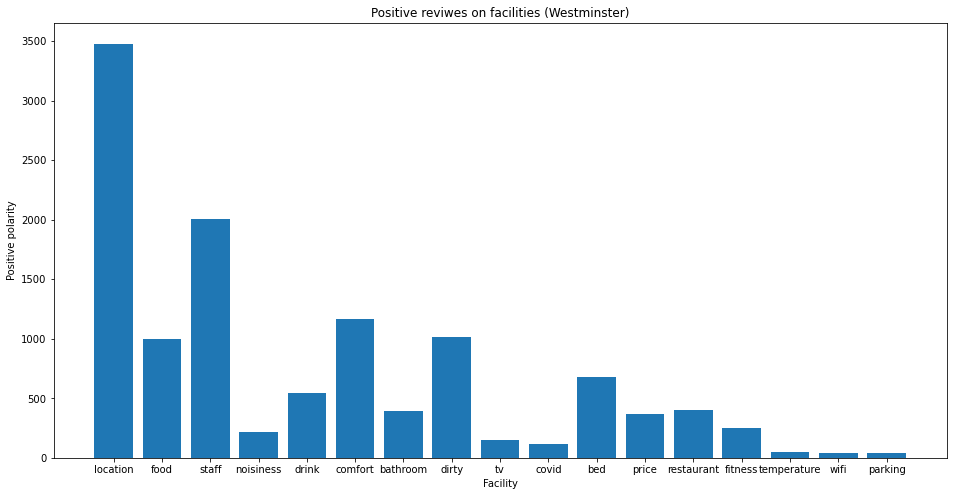

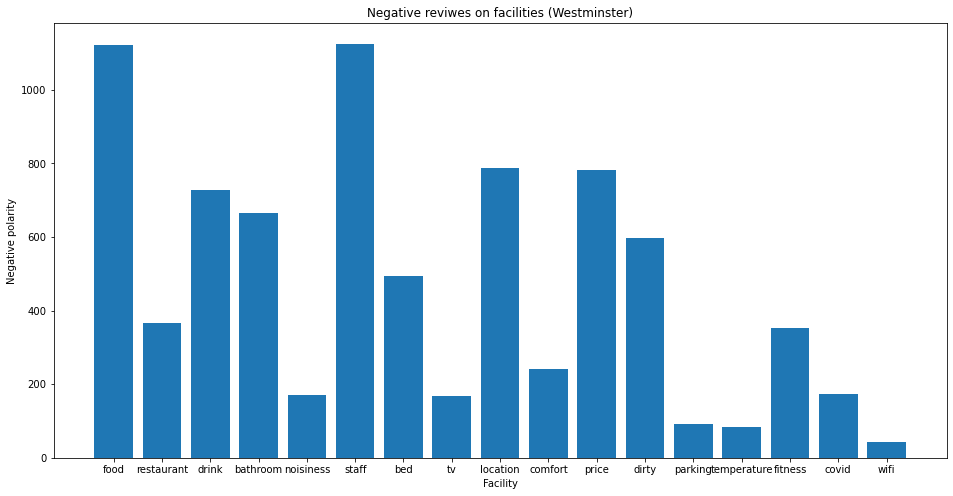

In [5]:
df = pd.read_csv("hotels-parsed-added-facilities/westminster(parsed1)_facilities.csv")
df.dropna(inplace=True)
fac_poz_westminster_pp = {}
for x, y in zip(df['Facilities'], df['Positive']):  
    if y == 1:
        sp = x.split('|')
        for s in sp:
            if s != '':
                if s in fac_poz_westminster_pp.keys():
                    fac_poz_westminster_pp[s] = fac_poz_westminster_pp[s] + 1
                else:
                    fac_poz_westminster_pp[s] = 1
fac_neg_westminster_pp = {}
for x, y in zip(df['Facilities'], df['Negative']):  
    if y == 1:
        sp = x.split('|')
        for s in sp:
            if s != '':
                if s in fac_neg_westminster_pp.keys():
                    fac_neg_westminster_pp[s] = fac_neg_westminster_pp[s] + 1
                else:
                    fac_neg_westminster_pp[s] = 1
print(fac_poz_westminster_pp)
print(fac_neg_westminster_pp)
plt.figure(figsize=(16,8))
plt.ylabel('Positive polarity')
plt.xlabel('Facility')
plt.title('Positive reviwes on facilities (Westminster)')
keys = fac_poz_westminster_pp.keys()
values = fac_poz_westminster_pp.values()
plt.bar(keys, values)

plt.figure(figsize=(16,8))
plt.ylabel('Negative polarity')
plt.xlabel('Facility')
plt.title('Negative reviwes on facilities (Westminster)')
keys = fac_neg_westminster_pp.keys()
values = fac_neg_westminster_pp.values()
plt.bar(keys, values)

{'food': 317, 'wifi': 13, 'comfort': 298, 'bed': 200, 'tv': 48, 'staff': 781, 'dirty': 270, 'location': 1020, 'drink': 153, 'price': 103, 'covid': 34, 'temperature': 20, 'bathroom': 102, 'parking': 14, 'restaurant': 116, 'fitness': 19, 'noisiness': 74}
{'bed': 117, 'bathroom': 190, 'location': 269, 'comfort': 61, 'food': 349, 'covid': 21, 'drink': 178, 'dirty': 122, 'temperature': 66, 'staff': 232, 'noisiness': 74, 'restaurant': 190, 'fitness': 23, 'wifi': 28, 'price': 205, 'tv': 57, 'parking': 26}


<BarContainer object of 17 artists>

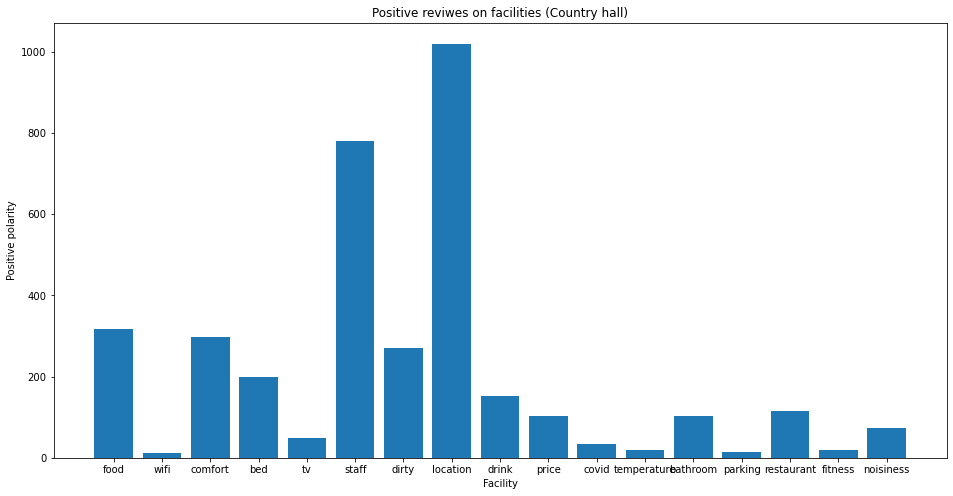

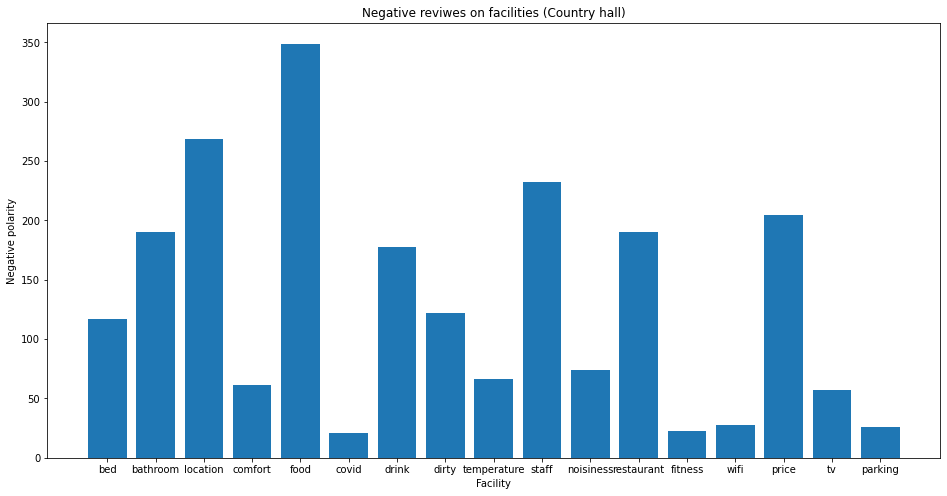

In [6]:
df = pd.read_csv("hotels-parsed-added-facilities/country_hall(parsed)(1)_facilities.csv")
df.dropna(inplace=True)
fac_poz_country_hall_pp = {}
for x, y in zip(df['Facilities'], df['Positive']):  
    if y == 1:
        sp = x.split('|')
        for s in sp:
            if s != '':
                if s in fac_poz_country_hall_pp.keys():
                    fac_poz_country_hall_pp[s] = fac_poz_country_hall_pp[s] + 1
                else:
                    fac_poz_country_hall_pp[s] = 1
fac_neg_country_hall_pp = {}
for x, y in zip(df['Facilities'], df['Negative']):  
    if y == 1:
        sp = x.split('|')
        for s in sp:
            if s != '':
                if s in fac_neg_country_hall_pp.keys():
                    fac_neg_country_hall_pp[s] = fac_neg_country_hall_pp[s] + 1
                else:
                    fac_neg_country_hall_pp[s] = 1
print(fac_poz_country_hall_pp)
print(fac_neg_country_hall_pp)
plt.figure(figsize=(16,8))
plt.ylabel('Positive polarity')
plt.xlabel('Facility')
plt.title('Positive reviwes on facilities (Country hall)')
keys = fac_poz_country_hall_pp.keys()
values = fac_poz_country_hall_pp.values()
plt.bar(keys, values)

plt.figure(figsize=(16,8))
plt.ylabel('Negative polarity')
plt.xlabel('Facility')
plt.title('Negative reviwes on facilities (Country hall)')
keys = fac_neg_country_hall_pp.keys()
values = fac_neg_country_hall_pp.values()
plt.bar(keys, values)

{'staff': 768, 'food': 440, 'drink': 202, 'location': 1446, 'price': 194, 'bed': 335, 'tv': 89, 'wifi': 32, 'bathroom': 178, 'comfort': 415, 'noisiness': 104, 'dirty': 387, 'covid': 36, 'fitness': 22, 'parking': 51, 'restaurant': 190, 'temperature': 31}
{'staff': 334, 'dirty': 279, 'bathroom': 321, 'comfort': 157, 'bed': 373, 'covid': 48, 'location': 296, 'tv': 109, 'restaurant': 144, 'drink': 267, 'food': 250, 'parking': 147, 'price': 219, 'wifi': 31, 'temperature': 72, 'noisiness': 155, 'fitness': 8}


<BarContainer object of 17 artists>

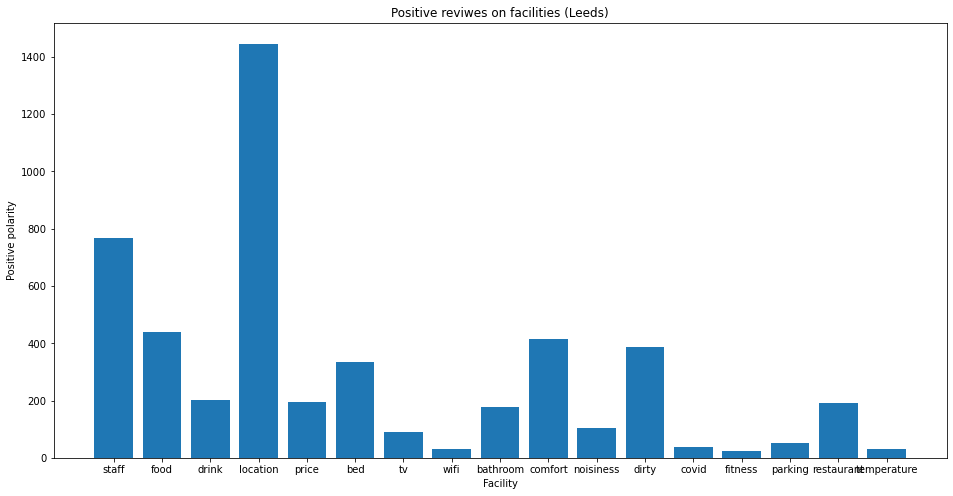

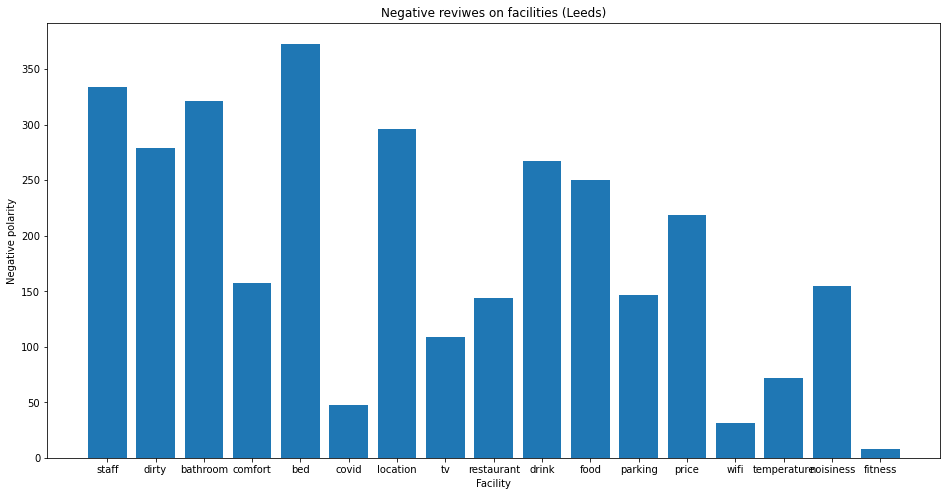

In [7]:
df = pd.read_csv("hotels-parsed-added-facilities/leeds(parsed)(1)_facilities.csv")
df.dropna(inplace=True)
fac_poz_leeds_pp = {}
for x, y in zip(df['Facilities'], df['Positive']):  
    if y == 1:
        sp = x.split('|')
        for s in sp:
            if s != '':
                if s in fac_poz_leeds_pp.keys():
                    fac_poz_leeds_pp[s] = fac_poz_leeds_pp[s] + 1
                else:
                    fac_poz_leeds_pp[s] = 1
fac_neg_leeds_pp = {}
for x, y in zip(df['Facilities'], df['Negative']):  
    if y == 1:
        sp = x.split('|')
        for s in sp:
            if s != '':
                if s in fac_neg_leeds_pp.keys():
                    fac_neg_leeds_pp[s] = fac_neg_leeds_pp[s] + 1
                else:
                    fac_neg_leeds_pp[s] = 1
print(fac_poz_leeds_pp)
print(fac_neg_leeds_pp)
plt.figure(figsize=(16,8))
plt.ylabel('Positive polarity')
plt.xlabel('Facility')
plt.title('Positive reviwes on facilities (Leeds)')
keys = fac_poz_leeds_pp.keys()
values = fac_poz_leeds_pp.values()
plt.bar(keys, values)

plt.figure(figsize=(16,8))
plt.ylabel('Negative polarity')
plt.xlabel('Facility')
plt.title('Negative reviwes on facilities (Leeds)')
keys = fac_neg_leeds_pp.keys()
values = fac_neg_leeds_pp.values()
plt.bar(keys, values)

{'staff': 765, 'drink': 163, 'food': 329, 'noisiness': 92, 'comfort': 725, 'bathroom': 171, 'bed': 334, 'dirty': 600, 'price': 198, 'location': 571, 'parking': 98, 'restaurant': 122, 'fitness': 31, 'covid': 19, 'temperature': 46, 'tv': 140, 'wifi': 41}
{'bathroom': 334, 'location': 293, 'staff': 400, 'parking': 218, 'price': 257, 'bed': 181, 'drink': 279, 'restaurant': 153, 'tv': 110, 'food': 426, 'wifi': 25, 'dirty': 201, 'covid': 28, 'temperature': 27, 'comfort': 58, 'noisiness': 88, 'fitness': 22}


<BarContainer object of 17 artists>

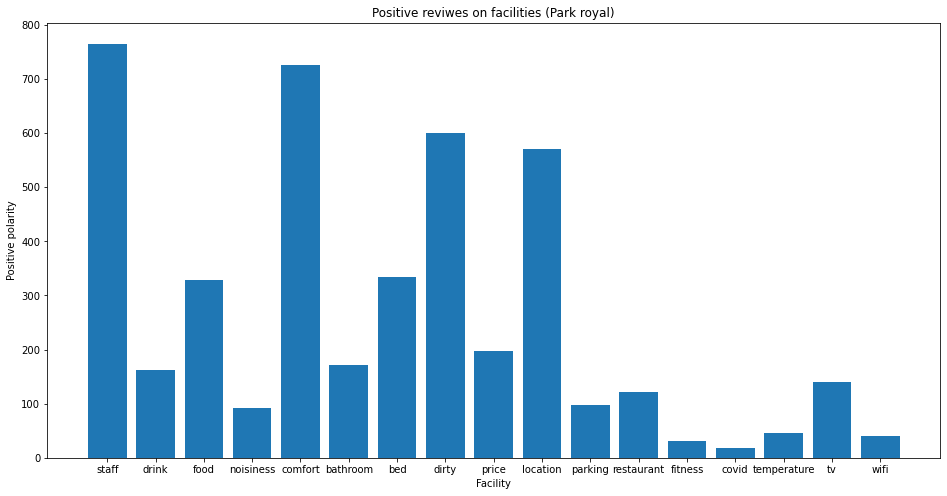

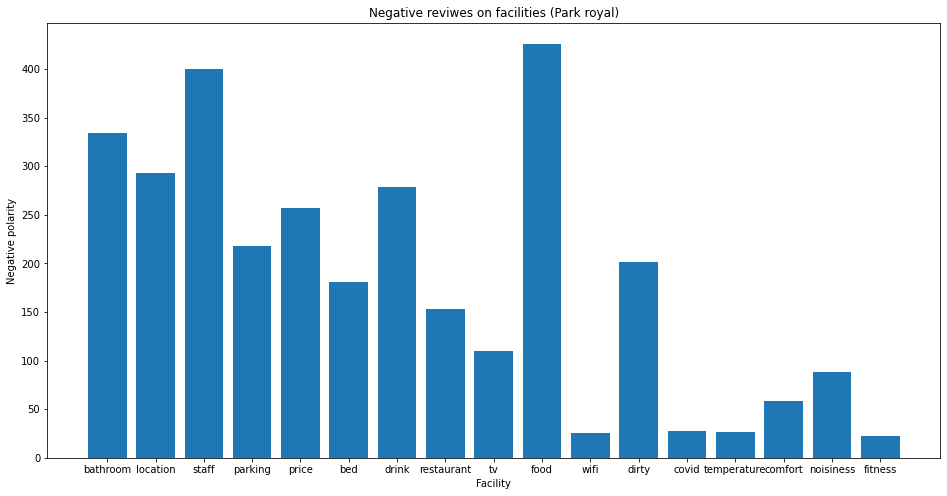

In [8]:
df = pd.read_csv("hotels-parsed-added-facilities/park_royal(parsed1)_facilities.csv")
df.dropna(inplace=True)
fac_poz_park_royal_pp = {}
for x, y in zip(df['Facilities'], df['Positive']):  
    if y == 1:
        sp = x.split('|')
        for s in sp:
            if s != '':
                if s in fac_poz_park_royal_pp.keys():
                    fac_poz_park_royal_pp[s] = fac_poz_park_royal_pp[s] + 1
                else:
                    fac_poz_park_royal_pp[s] = 1
fac_neg_park_royal_pp = {}
for x, y in zip(df['Facilities'], df['Negative']):  
    if y == 1:
        sp = x.split('|')
        for s in sp:
            if s != '':
                if s in fac_neg_park_royal_pp.keys():
                    fac_neg_park_royal_pp[s] = fac_neg_park_royal_pp[s] + 1
                else:
                    fac_neg_park_royal_pp[s] = 1
print(fac_poz_park_royal_pp)
print(fac_neg_park_royal_pp)
plt.figure(figsize=(16,8))
plt.ylabel('Positive polarity')
plt.xlabel('Facility')
plt.title('Positive reviwes on facilities (Park royal)')
keys = fac_poz_park_royal_pp.keys()
values = fac_poz_park_royal_pp.values()
plt.bar(keys, values)

plt.figure(figsize=(16,8))
plt.ylabel('Negative polarity')
plt.xlabel('Facility')
plt.title('Negative reviwes on facilities (Park royal)')
keys = fac_neg_park_royal_pp.keys()
values = fac_neg_park_royal_pp.values()
plt.bar(keys, values)

{'dirty': 460, 'comfort': 817, 'staff': 1164, 'food': 510, 'restaurant': 278, 'location': 1407, 'covid': 6, 'tv': 54, 'drink': 292, 'bed': 454, 'bathroom': 190, 'wifi': 21, 'price': 172, 'noisiness': 119, 'fitness': 137, 'parking': 15, 'temperature': 44}
{'location': 464, 'covid': 10, 'bathroom': 381, 'price': 340, 'staff': 548, 'dirty': 329, 'comfort': 110, 'bed': 246, 'food': 547, 'drink': 446, 'tv': 138, 'wifi': 23, 'noisiness': 157, 'fitness': 119, 'restaurant': 288, 'temperature': 143, 'parking': 31}


<BarContainer object of 17 artists>

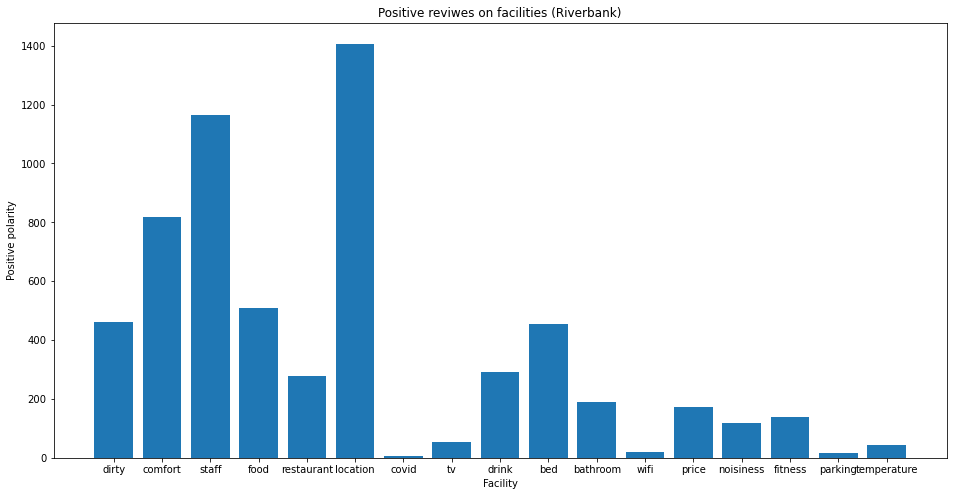

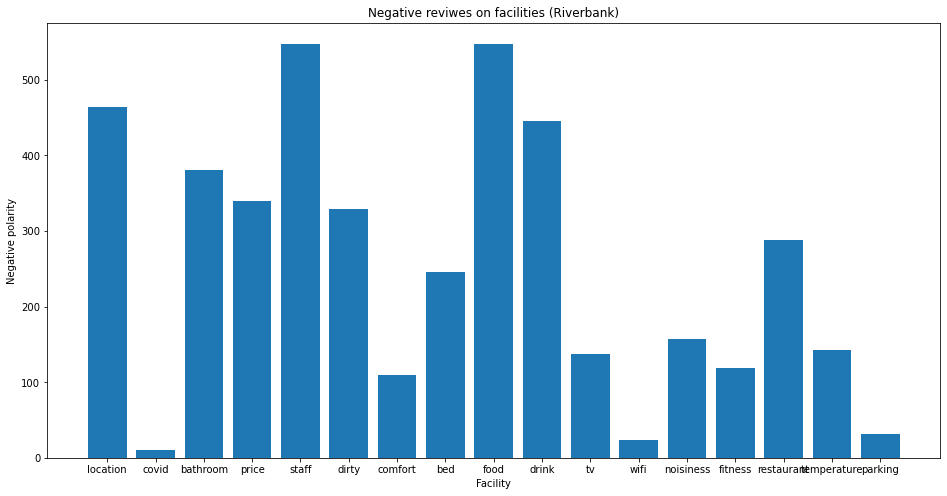

In [9]:
df = pd.read_csv("hotels-parsed-added-facilities/riverbank(parsed1)_facilities.csv")
df.dropna(inplace=True)
fac_poz_riverbank_pp = {}
for x, y in zip(df['Facilities'], df['Positive']):  
    if y == 1:
        sp = x.split('|')
        for s in sp:
            if s != '':
                if s in fac_poz_riverbank_pp.keys():
                    fac_poz_riverbank_pp[s] = fac_poz_riverbank_pp[s] + 1
                else:
                    fac_poz_riverbank_pp[s] = 1
fac_neg_riverbank_pp = {}
for x, y in zip(df['Facilities'], df['Negative']):  
    if y == 1:
        sp = x.split('|')
        for s in sp:
            if s != '':
                if s in fac_neg_riverbank_pp.keys():
                    fac_neg_riverbank_pp[s] = fac_neg_riverbank_pp[s] + 1
                else:
                    fac_neg_riverbank_pp[s] = 1
print(fac_poz_riverbank_pp)
print(fac_neg_riverbank_pp)
plt.figure(figsize=(16,8))
plt.ylabel('Positive polarity')
plt.xlabel('Facility')
plt.title('Positive reviwes on facilities (Riverbank)')
keys = fac_poz_riverbank_pp.keys()
values = fac_poz_riverbank_pp.values()
plt.bar(keys, values)

plt.figure(figsize=(16,8))
plt.ylabel('Negative polarity')
plt.xlabel('Facility')
plt.title('Negative reviwes on facilities (Riverbank)')
keys = fac_neg_riverbank_pp.keys()
values = fac_neg_riverbank_pp.values()
plt.bar(keys, values)

{'location': 688, 'food': 299, 'restaurant': 144, 'dirty': 218, 'staff': 556, 'comfort': 337, 'bed': 235, 'drink': 134, 'parking': 15, 'price': 73, 'covid': 18, 'bathroom': 96, 'tv': 31, 'wifi': 11, 'noisiness': 66, 'temperature': 17, 'fitness': 26}
{'location': 116, 'staff': 179, 'bathroom': 170, 'dirty': 108, 'drink': 141, 'bed': 66, 'food': 151, 'temperature': 56, 'parking': 18, 'price': 123, 'comfort': 38, 'restaurant': 85, 'noisiness': 78, 'covid': 13, 'tv': 36, 'wifi': 21, 'fitness': 9}


<BarContainer object of 17 artists>

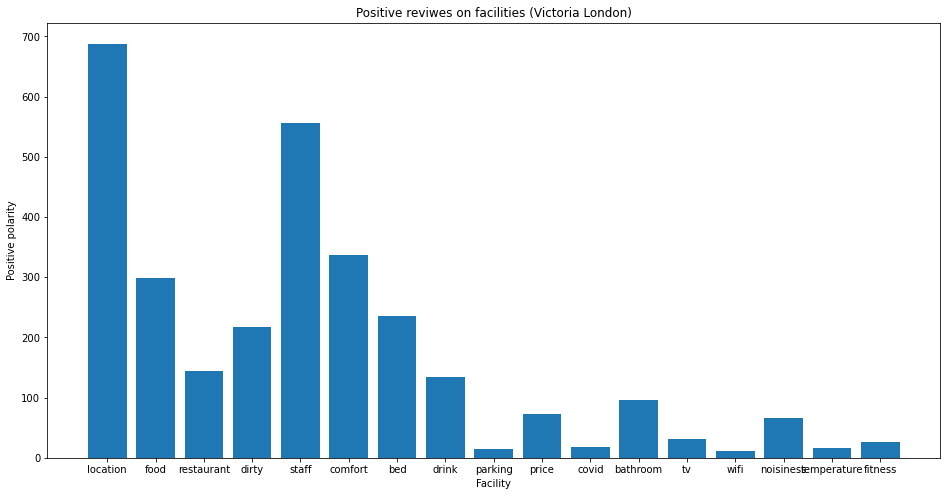

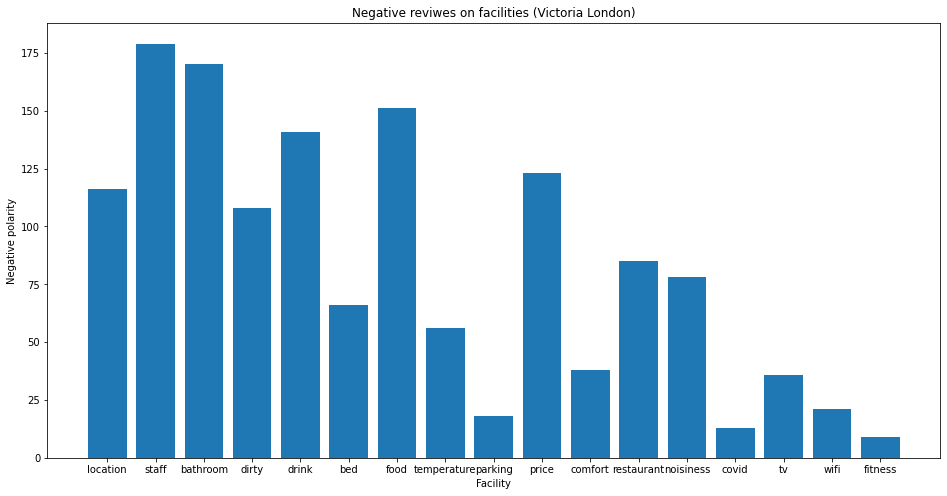

In [64]:
df = pd.read_csv("hotels-parsed-added-facilities/victoria_london(parsed)_facilities.csv")
df.dropna(inplace=True)
fac_poz_victoria_london_pp = {}
for x, y in zip(df['Facilities'], df['Positive']):  
    if y == 1:
        sp = x.split('|')
        for s in sp:
            if s != '':
                if s in fac_poz_victoria_london_pp.keys():
                    fac_poz_victoria_london_pp[s] = fac_poz_victoria_london_pp[s] + 1
                else:
                    fac_poz_victoria_london_pp[s] = 1
fac_neg_victoria_london_pp = {}
for x, y in zip(df['Facilities'], df['Negative']):  
    if y == 1:
        sp = x.split('|')
        for s in sp:
            if s != '':
                if s in fac_neg_victoria_london_pp.keys():
                    fac_neg_victoria_london_pp[s] = fac_neg_victoria_london_pp[s] + 1
                else:
                    fac_neg_victoria_london_pp[s] = 1
print(fac_poz_victoria_london_pp)
print(fac_neg_victoria_london_pp)
plt.figure(figsize=(16,8))
plt.ylabel('Positive polarity')
plt.xlabel('Facility')
plt.title('Positive reviwes on facilities (Victoria London)')
keys = fac_poz_victoria_london_pp.keys()
values = fac_poz_victoria_london_pp.values()
plt.bar(keys, values)

plt.figure(figsize=(16,8))
plt.ylabel('Negative polarity')
plt.xlabel('Facility')
plt.title('Negative reviwes on facilities (Victoria London)')
keys = fac_neg_victoria_london_pp.keys()
values = fac_neg_victoria_london_pp.values()
plt.bar(keys, values)

{'food': 283, 'comfort': 299, 'bathroom': 91, 'staff': 578, 'dirty': 246, 'location': 966, 'fitness': 64, 'noisiness': 45, 'bed': 156, 'temperature': 17, 'covid': 4, 'drink': 148, 'restaurant': 149, 'tv': 17, 'price': 52, 'parking': 8, 'wifi': 8}
{'bathroom': 151, 'tv': 57, 'staff': 245, 'bed': 119, 'price': 189, 'dirty': 140, 'food': 116, 'location': 242, 'drink': 113, 'restaurant': 64, 'fitness': 60, 'temperature': 34, 'noisiness': 94, 'parking': 27, 'wifi': 10, 'covid': 13, 'comfort': 45}


<BarContainer object of 17 artists>

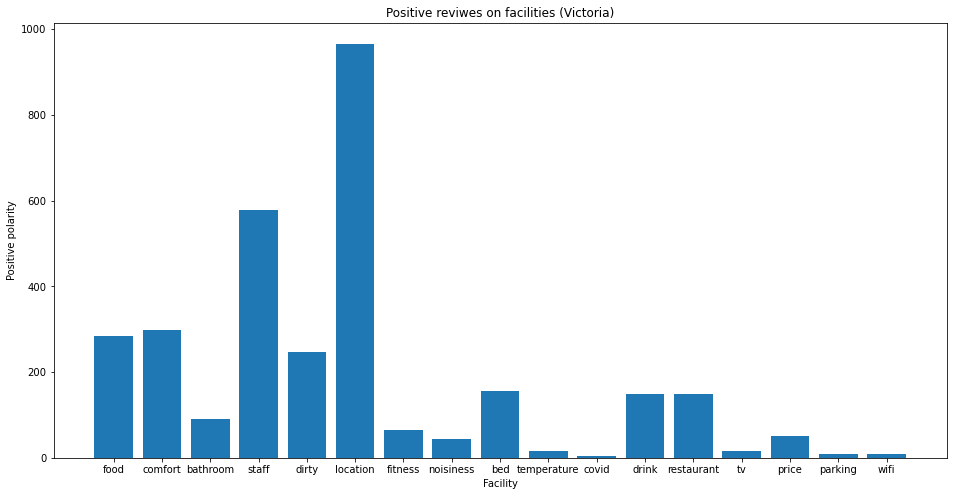

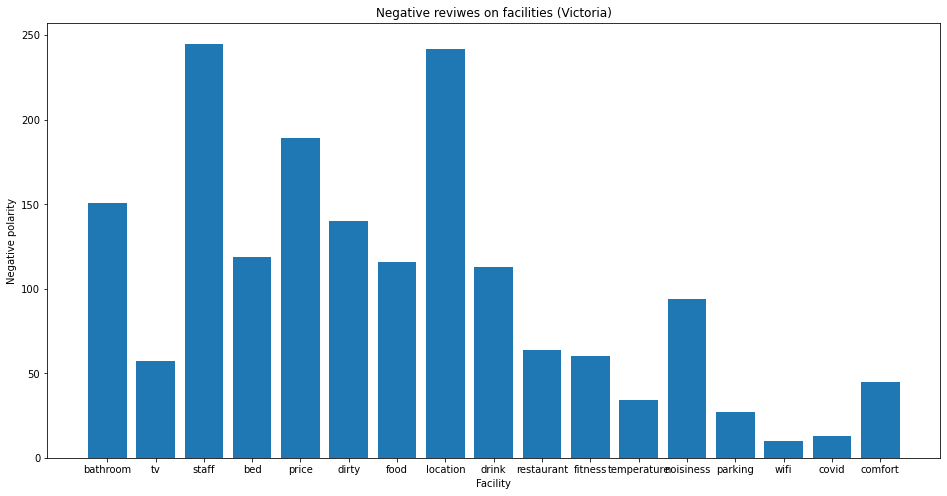

In [65]:
df = pd.read_csv("hotels-parsed-added-facilities/victoria(parsed)(1)_facilities.csv")
df.dropna(inplace=True)
fac_poz_victoria_pp = {}
for x, y in zip(df['Facilities'], df['Positive']):  
    if y == 1:
        sp = x.split('|')
        for s in sp:
            if s != '':
                if s in fac_poz_victoria_pp.keys():
                    fac_poz_victoria_pp[s] = fac_poz_victoria_pp[s] + 1
                else:
                    fac_poz_victoria_pp[s] = 1
fac_neg_victoria_pp = {}
for x, y in zip(df['Facilities'], df['Negative']):  
    if y == 1:
        sp = x.split('|')
        for s in sp:
            if s != '':
                if s in fac_neg_victoria_pp.keys():
                    fac_neg_victoria_pp[s] = fac_neg_victoria_pp[s] + 1
                else:
                    fac_neg_victoria_pp[s] = 1
print(fac_poz_victoria_pp)
print(fac_neg_victoria_pp)
plt.figure(figsize=(16,8))
plt.ylabel('Positive polarity')
plt.xlabel('Facility')
plt.title('Positive reviwes on facilities (Victoria)')
keys = fac_poz_victoria_pp.keys()
values = fac_poz_victoria_pp.values()
plt.bar(keys, values)

plt.figure(figsize=(16,8))
plt.ylabel('Negative polarity')
plt.xlabel('Facility')
plt.title('Negative reviwes on facilities (Victoria)')
keys = fac_neg_victoria_pp.keys()
values = fac_neg_victoria_pp.values()
plt.bar(keys, values)

{'food': 33, 'location': 117, 'dirty': 42, 'staff': 103, 'drink': 28, 'comfort': 56, 'restaurant': 37, 'bathroom': 31, 'noisiness': 19, 'covid': 2, 'bed': 27, 'parking': 3, 'price': 11, 'temperature': 3, 'tv': 10, 'wifi': 4, 'fitness': 4}
{'tv': 4, 'bed': 14, 'food': 24, 'parking': 5, 'staff': 15, 'drink': 16, 'price': 22, 'noisiness': 10, 'location': 26, 'restaurant': 17, 'wifi': 2, 'bathroom': 23, 'dirty': 10, 'covid': 1, 'comfort': 6, 'fitness': 5, 'temperature': 2}


<BarContainer object of 17 artists>

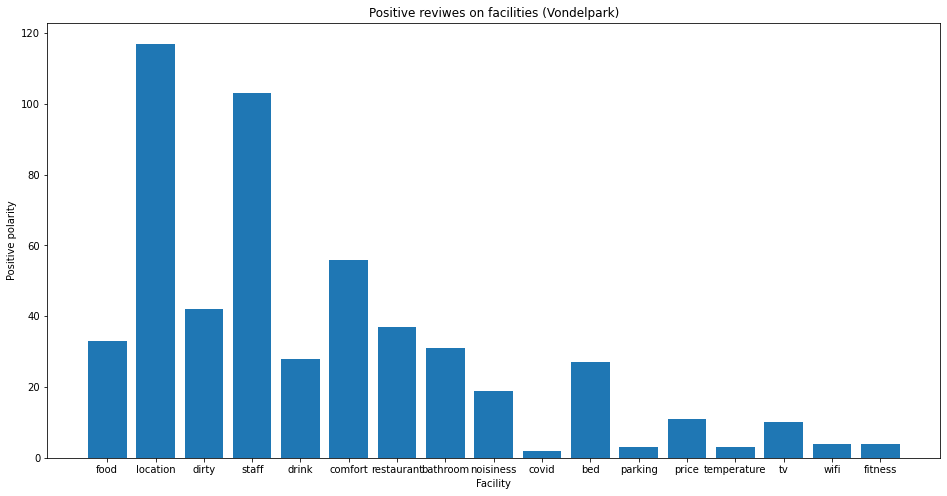

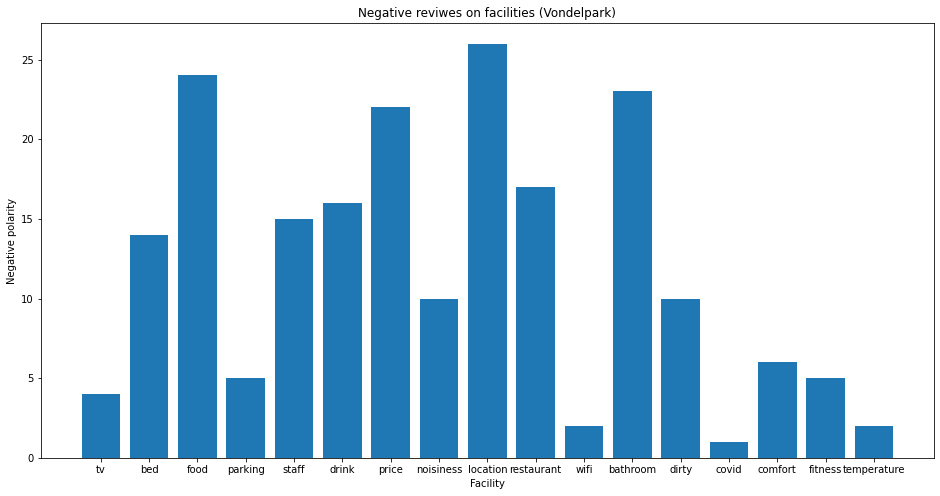

In [66]:
df = pd.read_csv("hotels-parsed-added-facilities/vondelpark(parsed)(1)_facilities.csv")
df.dropna(inplace=True)
fac_poz_vondelpark_pp = {}
for x, y in zip(df['Facilities'], df['Positive']):  
    if y == 1:
        sp = x.split('|')
        for s in sp:
            if s != '':
                if s in fac_poz_vondelpark_pp.keys():
                    fac_poz_vondelpark_pp[s] = fac_poz_vondelpark_pp[s] + 1
                else:
                    fac_poz_vondelpark_pp[s] = 1
fac_neg_vondelpark_pp = {}
for x, y in zip(df['Facilities'], df['Negative']):  
    if y == 1:
        sp = x.split('|')
        for s in sp:
            if s != '':
                if s in fac_neg_vondelpark_pp.keys():
                    fac_neg_vondelpark_pp[s] = fac_neg_vondelpark_pp[s] + 1
                else:
                    fac_neg_vondelpark_pp[s] = 1
print(fac_poz_vondelpark_pp)
print(fac_neg_vondelpark_pp)
plt.figure(figsize=(16,8))
plt.ylabel('Positive polarity')
plt.xlabel('Facility')
plt.title('Positive reviwes on facilities (Vondelpark)')
keys = fac_poz_vondelpark_pp.keys()
values = fac_poz_vondelpark_pp.values()
plt.bar(keys, values)

plt.figure(figsize=(16,8))
plt.ylabel('Negative polarity')
plt.xlabel('Facility')
plt.title('Negative reviwes on facilities (Vondelpark)')
keys = fac_neg_vondelpark_pp.keys()
values = fac_neg_vondelpark_pp.values()
plt.bar(keys, values)

{'food': 57, 'location': 112, 'dirty': 38, 'bathroom': 13, 'staff': 64, 'comfort': 36, 'bed': 16, 'wifi': 4, 'price': 12, 'drink': 13, 'fitness': 4, 'noisiness': 6, 'restaurant': 10, 'covid': 1, 'tv': 5, 'temperature': 3, 'parking': 16}
{'noisiness': 5, 'dirty': 8, 'price': 14, 'parking': 12, 'wifi': 6, 'food': 13, 'staff': 14, 'location': 18, 'comfort': 6, 'bed': 13, 'temperature': 4, 'drink': 7, 'restaurant': 8, 'bathroom': 10, 'fitness': 6, 'tv': 2}


<BarContainer object of 16 artists>

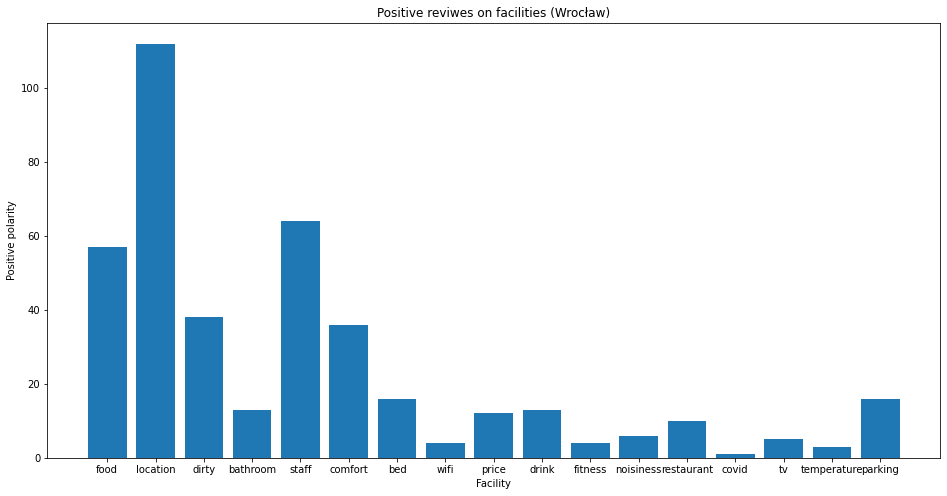

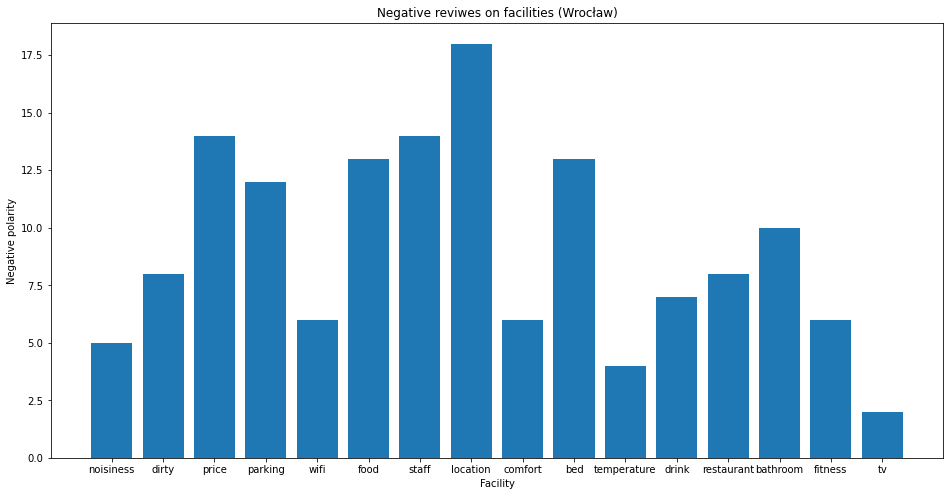

In [67]:
df = pd.read_csv("hotels-parsed-added-facilities/wrocław(parsed1)_facilities.csv")
df.dropna(inplace=True)
fac_poz_wrocław_pp = {}
for x, y in zip(df['Facilities'], df['Positive']):  
    if y == 1:
        sp = x.split('|')
        for s in sp:
            if s != '':
                if s in fac_poz_wrocław_pp.keys():
                    fac_poz_wrocław_pp[s] = fac_poz_wrocław_pp[s] + 1
                else:
                    fac_poz_wrocław_pp[s] = 1
fac_neg_wrocław_pp = {}
for x, y in zip(df['Facilities'], df['Negative']):  
    if y == 1:
        sp = x.split('|')
        for s in sp:
            if s != '':
                if s in fac_neg_wrocław_pp.keys():
                    fac_neg_wrocław_pp[s] = fac_neg_wrocław_pp[s] + 1
                else:
                    fac_neg_wrocław_pp[s] = 1
print(fac_poz_wrocław_pp)
print(fac_neg_wrocław_pp)
plt.figure(figsize=(16,8))
plt.ylabel('Positive polarity')
plt.xlabel('Facility')
plt.title('Positive reviwes on facilities (Wrocław)')
keys = fac_poz_wrocław_pp.keys()
values = fac_poz_wrocław_pp.values()
plt.bar(keys, values)

plt.figure(figsize=(16,8))
plt.ylabel('Negative polarity')
plt.xlabel('Facility')
plt.title('Negative reviwes on facilities (Wrocław)')
keys = fac_neg_wrocław_pp.keys()
values = fac_neg_wrocław_pp.values()
plt.bar(keys, values)

{'dirty': 241, 'staff': 642, 'location': 561, 'restaurant': 91, 'drink': 110, 'food': 273, 'bathroom': 74, 'comfort': 212, 'price': 76, 'bed': 132, 'covid': 10, 'parking': 19, 'noisiness': 50, 'fitness': 63, 'wifi': 10, 'tv': 6, 'temperature': 5}
{'price': 112, 'staff': 203, 'fitness': 88, 'drink': 94, 'bathroom': 129, 'restaurant': 64, 'parking': 23, 'food': 171, 'location': 153, 'dirty': 125, 'bed': 87, 'covid': 6, 'comfort': 35, 'noisiness': 60, 'tv': 26, 'temperature': 24, 'wifi': 13}


<BarContainer object of 17 artists>

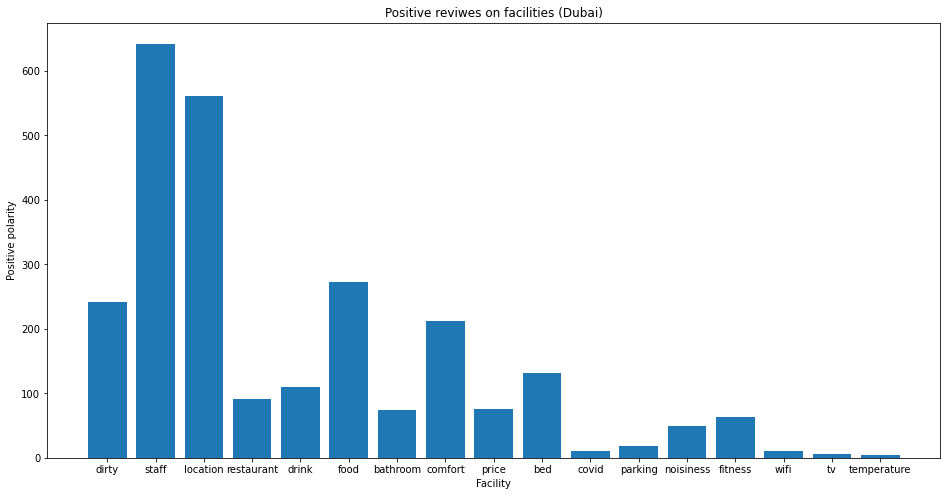

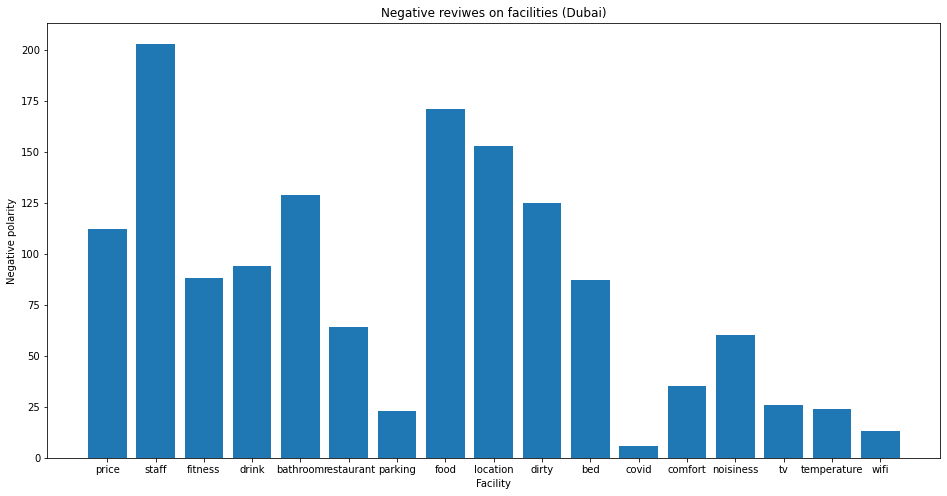

In [68]:
df = pd.read_csv("hotels-parsed-added-facilities/Radisson_Blu_Dubai_facilities.csv")
df.dropna(inplace=True)
fac_poz_dubai_rb = {}
for x, y in zip(df['Facilities'], df['Positive']):  
    if y == 1:
        sp = x.split('|')
        for s in sp:
            if s != '':
                if s in fac_poz_dubai_rb.keys():
                    fac_poz_dubai_rb[s] = fac_poz_dubai_rb[s] + 1
                else:
                    fac_poz_dubai_rb[s] = 1
fac_neg_dubai_rb = {}
for x, y in zip(df['Facilities'], df['Negative']):  
    if y == 1:
        sp = x.split('|')
        for s in sp:
            if s != '':
                if s in fac_neg_dubai_rb.keys():
                    fac_neg_dubai_rb[s] = fac_neg_dubai_rb[s] + 1
                else:
                    fac_neg_dubai_rb[s] = 1
print(fac_poz_dubai_rb)
print(fac_neg_dubai_rb)
plt.figure(figsize=(16,8))
plt.ylabel('Positive polarity')
plt.xlabel('Facility')
plt.title('Positive reviwes on facilities (Dubai)')
keys = fac_poz_dubai_rb.keys()
values = fac_poz_dubai_rb.values()
plt.bar(keys, values)

plt.figure(figsize=(16,8))
plt.ylabel('Negative polarity')
plt.xlabel('Facility')
plt.title('Negative reviwes on facilities (Dubai)')
keys = fac_neg_dubai_rb.keys()
values = fac_neg_dubai_rb.values()
plt.bar(keys, values)

{'location': 1323, 'bed': 509, 'comfort': 634, 'staff': 945, 'covid': 27, 'food': 544, 'drink': 222, 'parking': 122, 'dirty': 310, 'restaurant': 178, 'fitness': 168, 'price': 123, 'bathroom': 108, 'temperature': 12, 'noisiness': 106, 'tv': 30, 'wifi': 11}
{'location': 234, 'temperature': 73, 'noisiness': 102, 'bed': 185, 'dirty': 152, 'fitness': 93, 'covid': 28, 'staff': 274, 'food': 302, 'price': 212, 'restaurant': 177, 'bathroom': 212, 'drink': 252, 'parking': 56, 'tv': 50, 'comfort': 51, 'wifi': 7}


<BarContainer object of 17 artists>

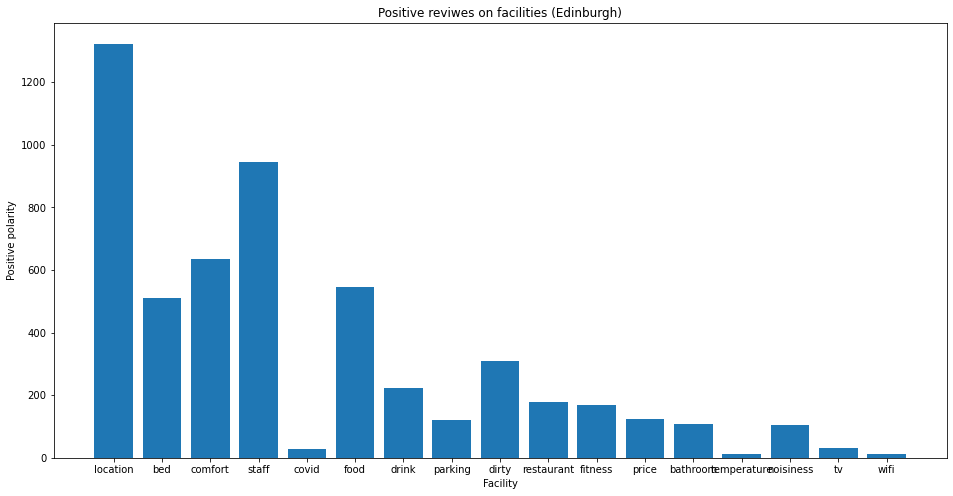

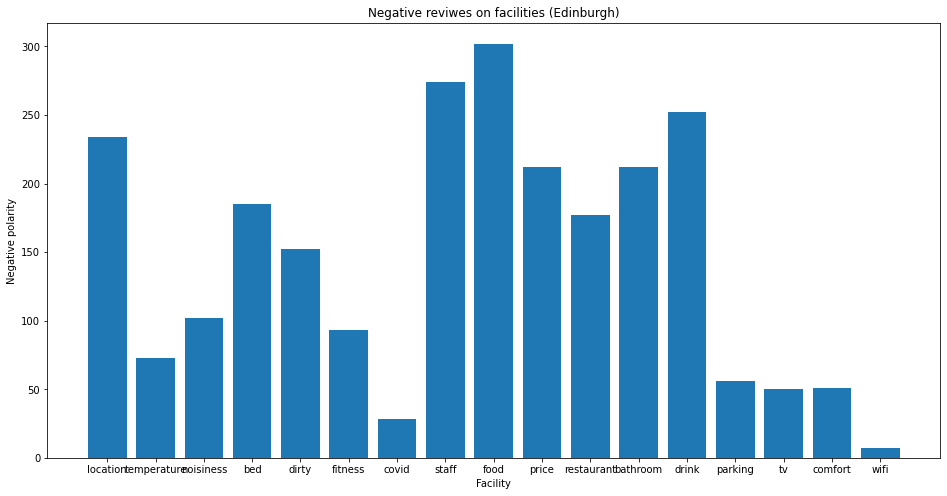

In [69]:
df = pd.read_csv("hotels-parsed-added-facilities/Radisson_Blu_ Edinburgh_facilities.csv")
df.dropna(inplace=True)
fac_poz_edinburgh_rb = {}
for x, y in zip(df['Facilities'], df['Positive']):  
    if y == 1:
        sp = x.split('|')
        for s in sp:
            if s != '':
                if s in fac_poz_edinburgh_rb.keys():
                    fac_poz_edinburgh_rb[s] = fac_poz_edinburgh_rb[s] + 1
                else:
                    fac_poz_edinburgh_rb[s] = 1
fac_neg_edinburgh_rb = {}
for x, y in zip(df['Facilities'], df['Negative']):  
    if y == 1:
        sp = x.split('|')
        for s in sp:
            if s != '':
                if s in fac_neg_edinburgh_rb.keys():
                    fac_neg_edinburgh_rb[s] = fac_neg_edinburgh_rb[s] + 1
                else:
                    fac_neg_edinburgh_rb[s] = 1
print(fac_poz_edinburgh_rb)
print(fac_neg_edinburgh_rb)
plt.figure(figsize=(16,8))
plt.ylabel('Positive polarity')
plt.xlabel('Facility')
plt.title('Positive reviwes on facilities (Edinburgh)')
keys = fac_poz_edinburgh_rb.keys()
values = fac_poz_edinburgh_rb.values()
plt.bar(keys, values)

plt.figure(figsize=(16,8))
plt.ylabel('Negative polarity')
plt.xlabel('Facility')
plt.title('Negative reviwes on facilities (Edinburgh)')
keys = fac_neg_edinburgh_rb.keys()
values = fac_neg_edinburgh_rb.values()
plt.bar(keys, values)

{'staff': 493, 'comfort': 263, 'bed': 183, 'price': 65, 'bathroom': 93, 'location': 571, 'covid': 2, 'dirty': 204, 'food': 333, 'restaurant': 100, 'drink': 94, 'parking': 4, 'temperature': 10, 'noisiness': 62, 'wifi': 11, 'tv': 16, 'fitness': 3}
{'dirty': 71, 'food': 145, 'comfort': 47, 'bathroom': 165, 'staff': 161, 'temperature': 57, 'noisiness': 167, 'location': 175, 'drink': 91, 'restaurant': 77, 'price': 114, 'bed': 134, 'tv': 34, 'parking': 11, 'fitness': 7, 'wifi': 6}


<BarContainer object of 16 artists>

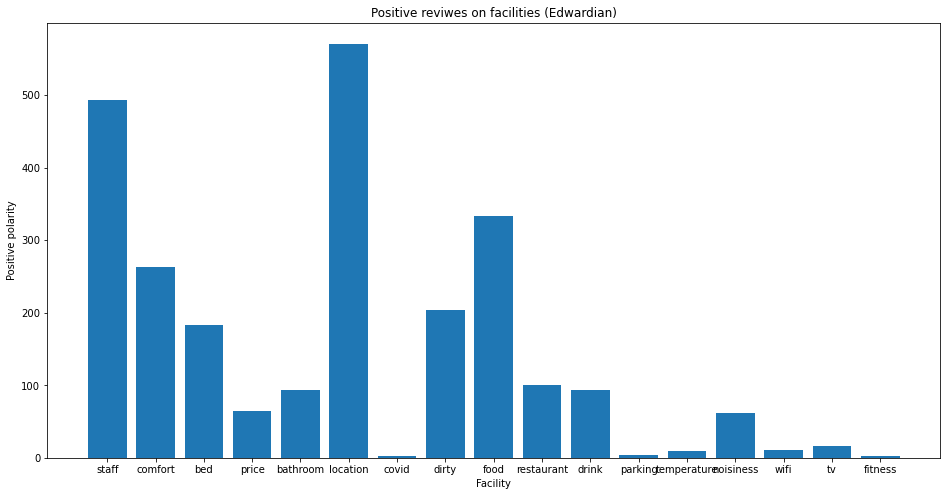

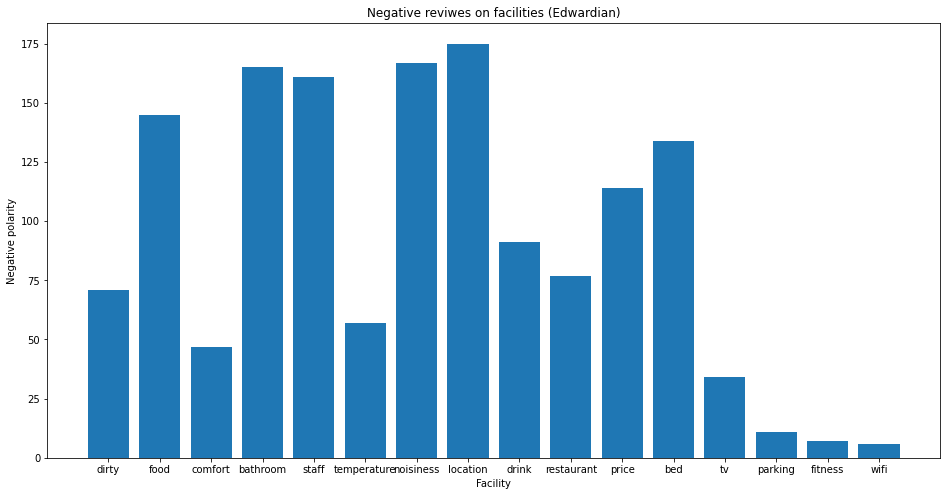

In [70]:
df = pd.read_csv("hotels-parsed-added-facilities/Radisson_Blu_Edwardian_facilities.csv")
df.dropna(inplace=True)
fac_poz_edwardian_rb = {}
for x, y in zip(df['Facilities'], df['Positive']):  
    if y == 1:
        sp = x.split('|')
        for s in sp:
            if s != '':
                if s in fac_poz_edwardian_rb.keys():
                    fac_poz_edwardian_rb[s] = fac_poz_edwardian_rb[s] + 1
                else:
                    fac_poz_edwardian_rb[s] = 1
fac_neg_edwardian_rb = {}
for x, y in zip(df['Facilities'], df['Negative']):  
    if y == 1:
        sp = x.split('|')
        for s in sp:
            if s != '':
                if s in fac_neg_edwardian_rb.keys():
                    fac_neg_edwardian_rb[s] = fac_neg_edwardian_rb[s] + 1
                else:
                    fac_neg_edwardian_rb[s] = 1
print(fac_poz_edwardian_rb)
print(fac_neg_edwardian_rb)
plt.figure(figsize=(16,8))
plt.ylabel('Positive polarity')
plt.xlabel('Facility')
plt.title('Positive reviwes on facilities (Edwardian)')
keys = fac_poz_edwardian_rb.keys()
values = fac_poz_edwardian_rb.values()
plt.bar(keys, values)

plt.figure(figsize=(16,8))
plt.ylabel('Negative polarity')
plt.xlabel('Facility')
plt.title('Negative reviwes on facilities (Edwardian)')
keys = fac_neg_edwardian_rb.keys()
values = fac_neg_edwardian_rb.values()
plt.bar(keys, values)

{'staff': 492, 'comfort': 263, 'bed': 183, 'price': 65, 'bathroom': 93, 'location': 571, 'covid': 2, 'dirty': 204, 'food': 333, 'restaurant': 100, 'drink': 94, 'parking': 4, 'temperature': 10, 'noisiness': 62, 'wifi': 11, 'tv': 16, 'fitness': 3}
{'dirty': 71, 'food': 145, 'comfort': 47, 'bathroom': 165, 'staff': 161, 'temperature': 57, 'noisiness': 167, 'location': 175, 'drink': 91, 'restaurant': 77, 'price': 114, 'bed': 134, 'tv': 34, 'parking': 11, 'fitness': 7, 'wifi': 6}


<BarContainer object of 16 artists>

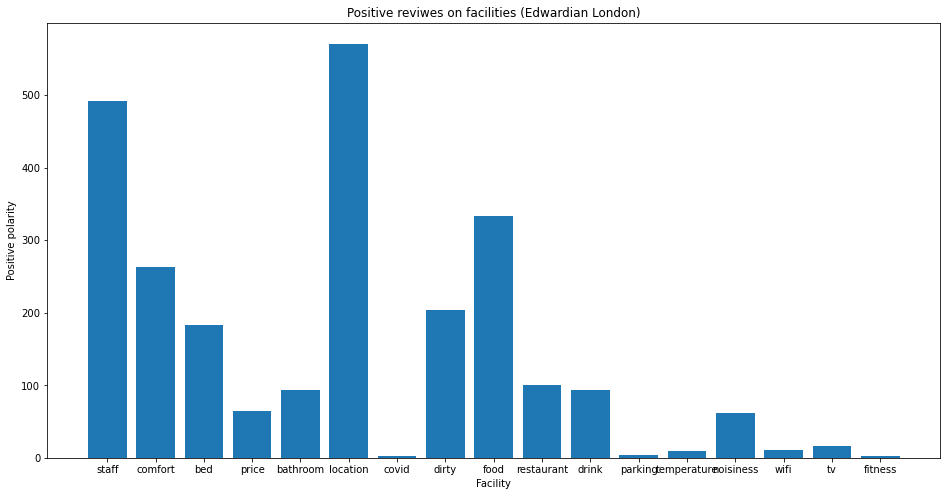

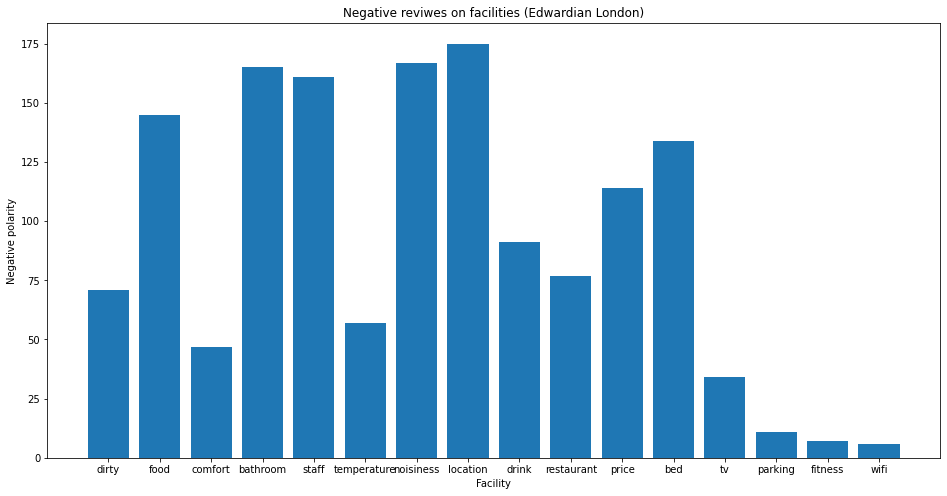

In [71]:
df = pd.read_csv("hotels-parsed-added-facilities/Radisson_Blu_Edwardian_London_facilities.csv")
df.dropna(inplace=True)
fac_poz_edwardian_london_rb = {}
for x, y in zip(df['Facilities'], df['Positive']):  
    if y == 1:
        sp = x.split('|')
        for s in sp:
            if s != '':
                if s in fac_poz_edwardian_london_rb.keys():
                    fac_poz_edwardian_london_rb[s] = fac_poz_edwardian_london_rb[s] + 1
                else:
                    fac_poz_edwardian_london_rb[s] = 1
fac_neg_edwardian_london_rb = {}
for x, y in zip(df['Facilities'], df['Negative']):  
    if y == 1:
        sp = x.split('|')
        for s in sp:
            if s != '':
                if s in fac_neg_edwardian_london_rb.keys():
                    fac_neg_edwardian_london_rb[s] = fac_neg_edwardian_london_rb[s] + 1
                else:
                    fac_neg_edwardian_london_rb[s] = 1
print(fac_poz_edwardian_london_rb)
print(fac_neg_edwardian_london_rb)
plt.figure(figsize=(16,8))
plt.ylabel('Positive polarity')
plt.xlabel('Facility')
plt.title('Positive reviwes on facilities (Edwardian London)')
keys = fac_poz_edwardian_london_rb.keys()
values = fac_poz_edwardian_london_rb.values()
plt.bar(keys, values)

plt.figure(figsize=(16,8))
plt.ylabel('Negative polarity')
plt.xlabel('Facility')
plt.title('Negative reviwes on facilities (Edwardian London)')
keys = fac_neg_edwardian_london_rb.keys()
values = fac_neg_edwardian_london_rb.values()
plt.bar(keys, values)

{'location': 612, 'staff': 728, 'wifi': 9, 'noisiness': 67, 'dirty': 234, 'food': 375, 'comfort': 417, 'drink': 192, 'restaurant': 147, 'bed': 293, 'price': 62, 'bathroom': 79, 'tv': 19, 'covid': 10, 'temperature': 7, 'parking': 15, 'fitness': 24}
{'food': 139, 'price': 157, 'staff': 164, 'comfort': 42, 'covid': 8, 'drink': 173, 'restaurant': 135, 'dirty': 103, 'noisiness': 65, 'location': 137, 'bathroom': 189, 'temperature': 50, 'fitness': 38, 'tv': 44, 'bed': 131, 'parking': 53, 'wifi': 12}


<BarContainer object of 17 artists>

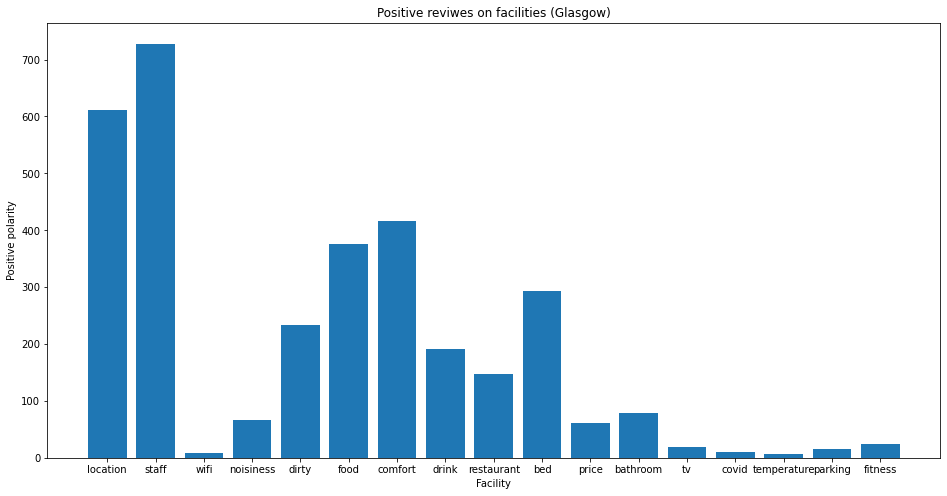

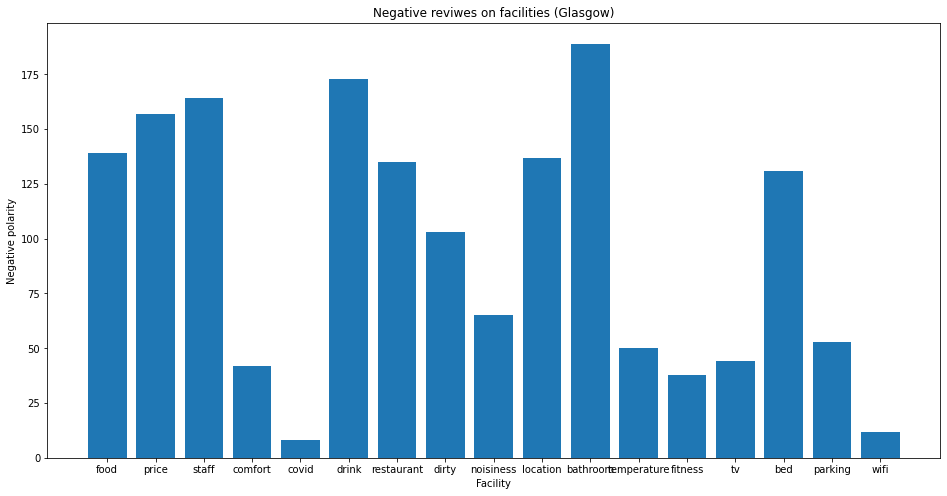

In [72]:
df = pd.read_csv("hotels-parsed-added-facilities/Radisson_Blu_Glasgow_facilities.csv")
df.dropna(inplace=True)
fac_poz_glasgow_rb = {}
for x, y in zip(df['Facilities'], df['Positive']):  
    if y == 1:
        sp = x.split('|')
        for s in sp:
            if s != '':
                if s in fac_poz_glasgow_rb.keys():
                    fac_poz_glasgow_rb[s] = fac_poz_glasgow_rb[s] + 1
                else:
                    fac_poz_glasgow_rb[s] = 1
fac_neg_glasgow_rb = {}
for x, y in zip(df['Facilities'], df['Negative']):  
    if y == 1:
        sp = x.split('|')
        for s in sp:
            if s != '':
                if s in fac_neg_glasgow_rb.keys():
                    fac_neg_glasgow_rb[s] = fac_neg_glasgow_rb[s] + 1
                else:
                    fac_neg_glasgow_rb[s] = 1
print(fac_poz_glasgow_rb)
print(fac_neg_glasgow_rb)
plt.figure(figsize=(16,8))
plt.ylabel('Positive polarity')
plt.xlabel('Facility')
plt.title('Positive reviwes on facilities (Glasgow)')
keys = fac_poz_glasgow_rb.keys()
values = fac_poz_glasgow_rb.values()
plt.bar(keys, values)

plt.figure(figsize=(16,8))
plt.ylabel('Negative polarity')
plt.xlabel('Facility')
plt.title('Negative reviwes on facilities (Glasgow)')
keys = fac_neg_glasgow_rb.keys()
values = fac_neg_glasgow_rb.values()
plt.bar(keys, values)

{'staff': 934, 'noisiness': 121, 'location': 901, 'price': 140, 'food': 517, 'comfort': 650, 'bed': 610, 'bathroom': 154, 'dirty': 425, 'covid': 29, 'drink': 204, 'restaurant': 159, 'fitness': 220, 'parking': 45, 'temperature': 29, 'wifi': 17, 'tv': 24}
{'tv': 126, 'location': 442, 'bed': 322, 'covid': 42, 'food': 465, 'wifi': 40, 'price': 352, 'bathroom': 451, 'staff': 484, 'drink': 416, 'restaurant': 268, 'fitness': 189, 'dirty': 338, 'parking': 194, 'comfort': 105, 'noisiness': 159, 'temperature': 208}


<BarContainer object of 17 artists>

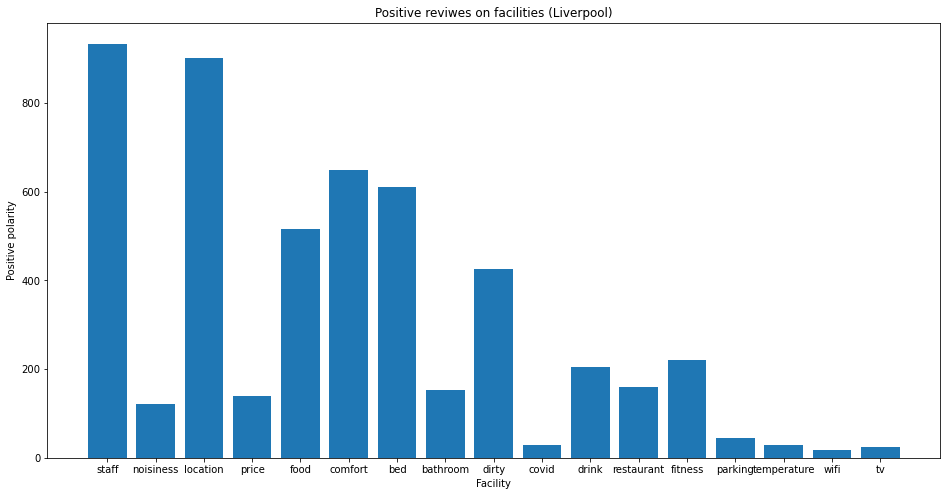

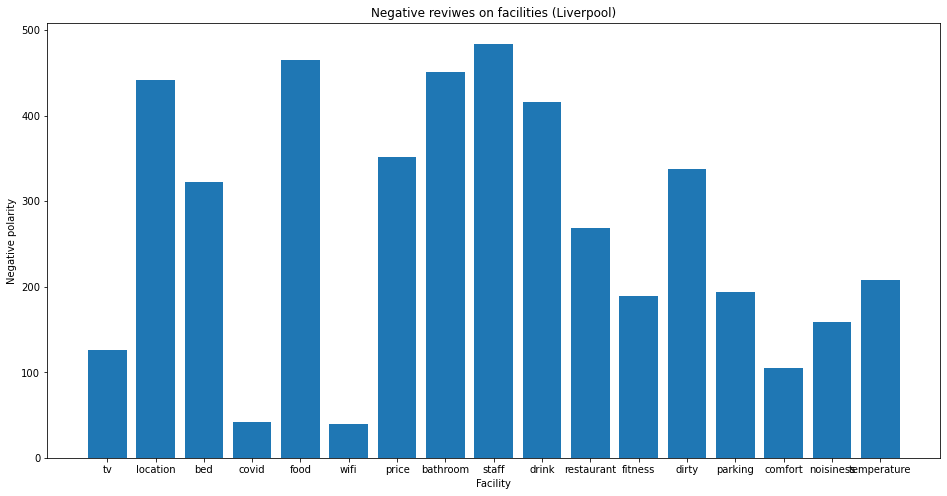

In [73]:
df = pd.read_csv("hotels-parsed-added-facilities/Radisson_Blu_Liverpool_facilities.csv")
df.dropna(inplace=True)
fac_poz_liverpool_rb = {}
for x, y in zip(df['Facilities'], df['Positive']):  
    if y == 1:
        sp = x.split('|')
        for s in sp:
            if s != '':
                if s in fac_poz_liverpool_rb.keys():
                    fac_poz_liverpool_rb[s] = fac_poz_liverpool_rb[s] + 1
                else:
                    fac_poz_liverpool_rb[s] = 1
fac_neg_liverpool_rb = {}
for x, y in zip(df['Facilities'], df['Negative']):  
    if y == 1:
        sp = x.split('|')
        for s in sp:
            if s != '':
                if s in fac_neg_liverpool_rb.keys():
                    fac_neg_liverpool_rb[s] = fac_neg_liverpool_rb[s] + 1
                else:
                    fac_neg_liverpool_rb[s] = 1
print(fac_poz_liverpool_rb)
print(fac_neg_liverpool_rb)
plt.figure(figsize=(16,8))
plt.ylabel('Positive polarity')
plt.xlabel('Facility')
plt.title('Positive reviwes on facilities (Liverpool)')
keys = fac_poz_liverpool_rb.keys()
values = fac_poz_liverpool_rb.values()
plt.bar(keys, values)

plt.figure(figsize=(16,8))
plt.ylabel('Negative polarity')
plt.xlabel('Facility')
plt.title('Negative reviwes on facilities (Liverpool)')
keys = fac_neg_liverpool_rb.keys()
values = fac_neg_liverpool_rb.values()
plt.bar(keys, values)

{'comfort': 1199, 'bed': 847, 'staff': 1345, 'location': 2448, 'dirty': 626, 'noisiness': 287, 'covid': 60, 'food': 895, 'price': 239, 'drink': 526, 'tv': 53, 'parking': 59, 'wifi': 18, 'bathroom': 203, 'restaurant': 411, 'fitness': 112, 'temperature': 25}
{'staff': 481, 'drink': 772, 'restaurant': 591, 'covid': 34, 'food': 683, 'price': 840, 'location': 386, 'noisiness': 75, 'fitness': 83, 'parking': 111, 'wifi': 21, 'temperature': 55, 'bathroom': 294, 'tv': 84, 'bed': 219, 'dirty': 165, 'comfort': 64}


<BarContainer object of 17 artists>

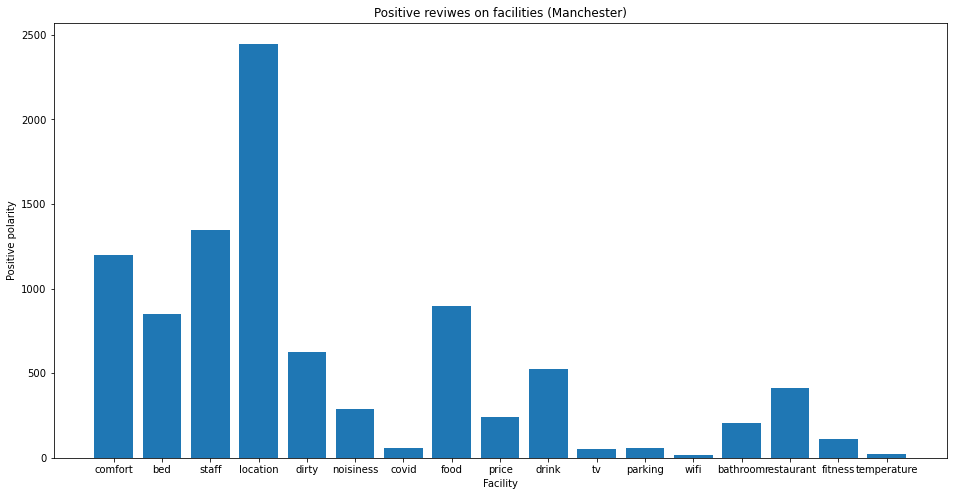

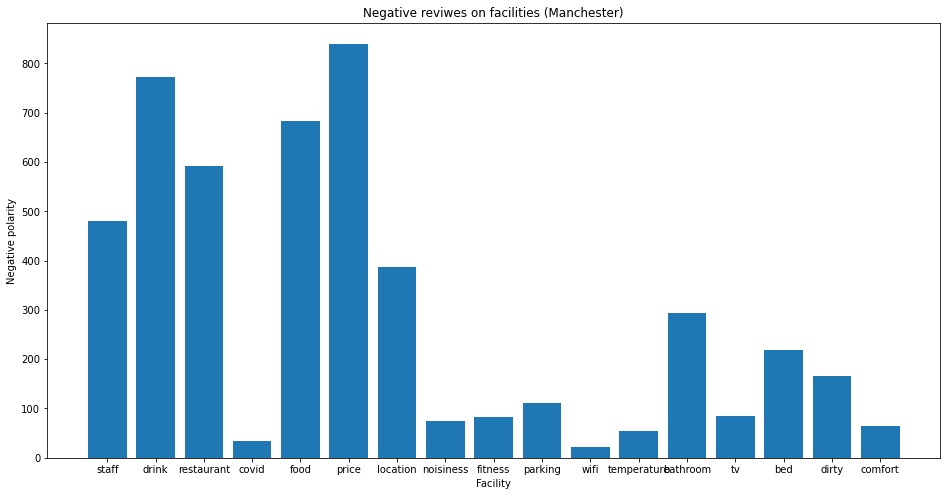

In [74]:
df = pd.read_csv("hotels-parsed-added-facilities/Radisson_Blu_Manchester_facilities.csv")
df.dropna(inplace=True)
fac_poz_manchester_rb = {}
for x, y in zip(df['Facilities'], df['Positive']):  
    if y == 1:
        sp = x.split('|')
        for s in sp:
            if s != '':
                if s in fac_poz_manchester_rb.keys():
                    fac_poz_manchester_rb[s] = fac_poz_manchester_rb[s] + 1
                else:
                    fac_poz_manchester_rb[s] = 1
fac_neg_manchester_rb = {}
for x, y in zip(df['Facilities'], df['Negative']):  
    if y == 1:
        sp = x.split('|')
        for s in sp:
            if s != '':
                if s in fac_neg_manchester_rb.keys():
                    fac_neg_manchester_rb[s] = fac_neg_manchester_rb[s] + 1
                else:
                    fac_neg_manchester_rb[s] = 1
print(fac_poz_manchester_rb)
print(fac_neg_manchester_rb)
plt.figure(figsize=(16,8))
plt.ylabel('Positive polarity')
plt.xlabel('Facility')
plt.title('Positive reviwes on facilities (Manchester)')
keys = fac_poz_manchester_rb.keys()
values = fac_poz_manchester_rb.values()
plt.bar(keys, values)

plt.figure(figsize=(16,8))
plt.ylabel('Negative polarity')
plt.xlabel('Facility')
plt.title('Negative reviwes on facilities (Manchester)')
keys = fac_neg_manchester_rb.keys()
values = fac_neg_manchester_rb.values()
plt.bar(keys, values)

{'staff': 636, 'location': 546, 'comfort': 289, 'bathroom': 139, 'fitness': 71, 'dirty': 209, 'tv': 7, 'noisiness': 77, 'drink': 109, 'restaurant': 93, 'bed': 208, 'covid': 4, 'food': 191, 'parking': 17, 'temperature': 8, 'price': 70, 'wifi': 6}
{'wifi': 15, 'tv': 28, 'bathroom': 47, 'dirty': 33, 'food': 81, 'staff': 97, 'noisiness': 33, 'price': 92, 'bed': 57, 'restaurant': 48, 'drink': 59, 'parking': 37, 'location': 110, 'comfort': 25, 'temperature': 16, 'fitness': 27, 'covid': 2}


<BarContainer object of 17 artists>

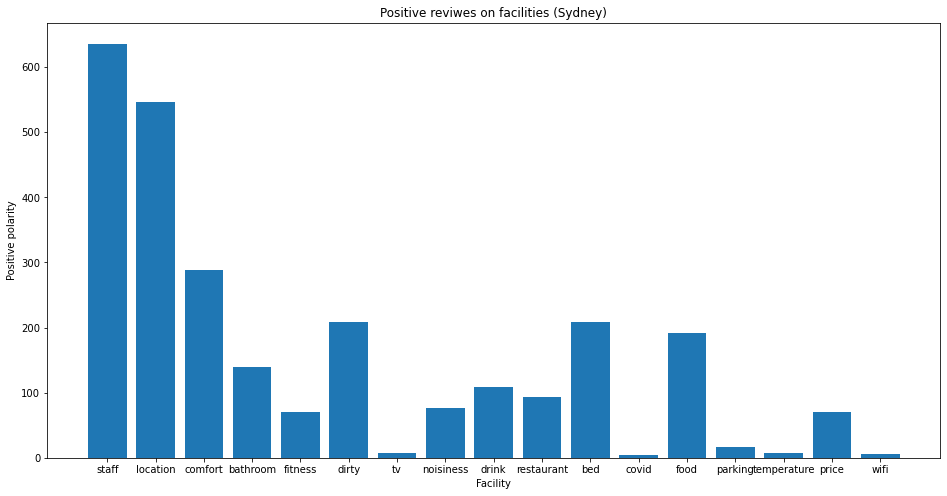

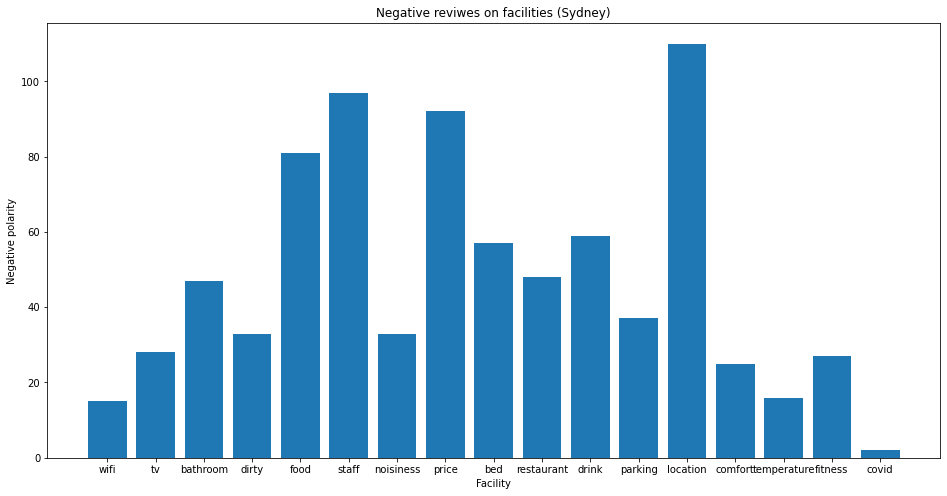

In [76]:
df = pd.read_csv("hotels-parsed-added-facilities/Radisson_Blu_Plaza Hotel Sydney_facilities.csv")
df.dropna(inplace=True)
fac_poz_sydney_rb = {}
for x, y in zip(df['Facilities'], df['Positive']):  
    if y == 1:
        sp = x.split('|')
        for s in sp:
            if s != '':
                if s in fac_poz_sydney_rb.keys():
                    fac_poz_sydney_rb[s] = fac_poz_sydney_rb[s] + 1
                else:
                    fac_poz_sydney_rb[s] = 1
fac_neg_sydney_rb = {}
for x, y in zip(df['Facilities'], df['Negative']):  
    if y == 1:
        sp = x.split('|')
        for s in sp:
            if s != '':
                if s in fac_neg_sydney_rb.keys():
                    fac_neg_sydney_rb[s] = fac_neg_sydney_rb[s] + 1
                else:
                    fac_neg_sydney_rb[s] = 1
print(fac_poz_sydney_rb)
print(fac_neg_sydney_rb)
plt.figure(figsize=(16,8))
plt.ylabel('Positive polarity')
plt.xlabel('Facility')
plt.title('Positive reviwes on facilities (Sydney)')
keys = fac_poz_sydney_rb.keys()
values = fac_poz_sydney_rb.values()
plt.bar(keys, values)

plt.figure(figsize=(16,8))
plt.ylabel('Negative polarity')
plt.xlabel('Facility')
plt.title('Negative reviwes on facilities (Sydney)')
keys = fac_neg_sydney_rb.keys()
values = fac_neg_sydney_rb.values()
plt.bar(keys, values)

In [80]:
# print(fac_poz_westminster_pp)
# print(fac_neg_westminster_pp)

# print(fac_poz_country_hall_pp)
# print(fac_neg_country_hall_pp)

# print(fac_poz_leeds_pp)
# print(fac_neg_leeds_pp)

# print(fac_poz_park_royal_pp)
# print(fac_neg_park_royal_pp)

# print(fac_poz_riverbank_pp)
# print(fac_neg_riverbank_pp)

# print(fac_poz_victoria_london_pp)
# print(fac_neg_victoria_london_pp)

# print(fac_poz_victoria_pp)
# print(fac_neg_victoria_pp)

# print(fac_poz_vondelpark_pp)
# print(fac_neg_vondelpark_pp)

# print(fac_poz_wrocław_pp)
# print(fac_neg_wrocław_pp)

# print(fac_poz_dubai_rb)
# print(fac_neg_dubai_rb)

# print(fac_poz_edinburgh_rb)
# print(fac_neg_edinburgh_rb)

# print(fac_poz_edwardian_rb)
# print(fac_neg_edwardian_rb)

# print(fac_poz_edwardian_london_rb)
# print(fac_neg_edwardian_london_rb)

# print(fac_poz_glasgow_rb)
# print(fac_neg_glasgow_rb)

# print(fac_poz_liverpool_rb)
# print(fac_neg_liverpool_rb)

# print(fac_poz_manchester_rb)
# print(fac_neg_manchester_rb)

# print(fac_poz_sydney_rb)
# print(fac_neg_sydney_rb)


{'location': 9805, 'food': 3267, 'staff': 6786, 'noisiness': 739, 'drink': 1678, 'comfort': 4150, 'bathroom': 1268, 'dirty': 3275, 'tv': 540, 'covid': 235, 'bed': 2438, 'price': 1179, 'restaurant': 1446, 'fitness': 560, 'temperature': 231, 'wifi': 172, 'parking': 263}
{'food': 2997, 'restaurant': 1315, 'drink': 2175, 'bathroom': 2244, 'noisiness': 832, 'staff': 3092, 'bed': 1623, 'tv': 682, 'location': 2511, 'comfort': 723, 'price': 2150, 'dirty': 1794, 'parking': 575, 'temperature': 487, 'fitness': 605, 'covid': 307, 'wifi': 190}
{'dirty': 2453, 'staff': 6215, 'location': 7533, 'restaurant': 1279, 'drink': 1551, 'food': 3461, 'bathroom': 943, 'comfort': 3927, 'price': 840, 'bed': 2965, 'covid': 144, 'parking': 285, 'noisiness': 832, 'fitness': 664, 'wifi': 93, 'tv': 171, 'temperature': 106}
{'price': 1993, 'staff': 2025, 'fitness': 532, 'drink': 1948, 'bathroom': 1652, 'restaurant': 1437, 'parking': 496, 'food': 2131, 'location': 1812, 'dirty': 1058, 'bed': 1269, 'covid': 120, 'comfor

<BarContainer object of 17 artists>

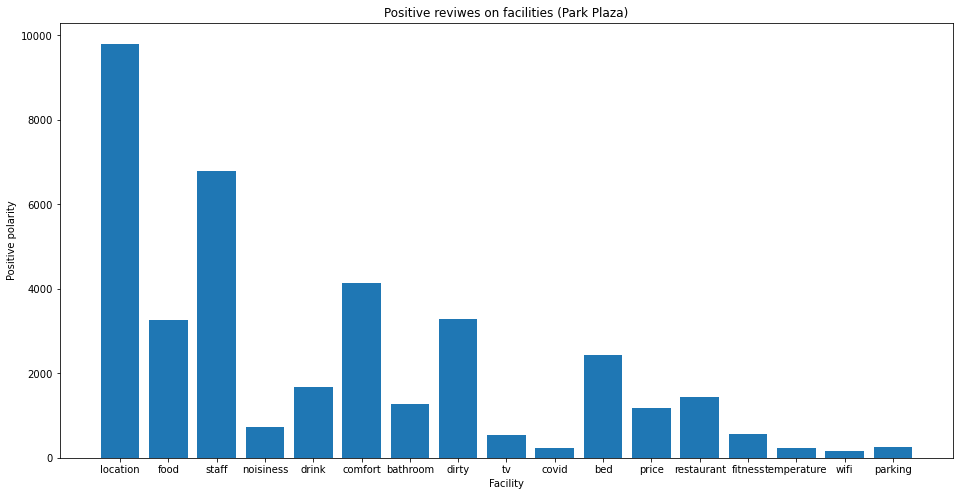

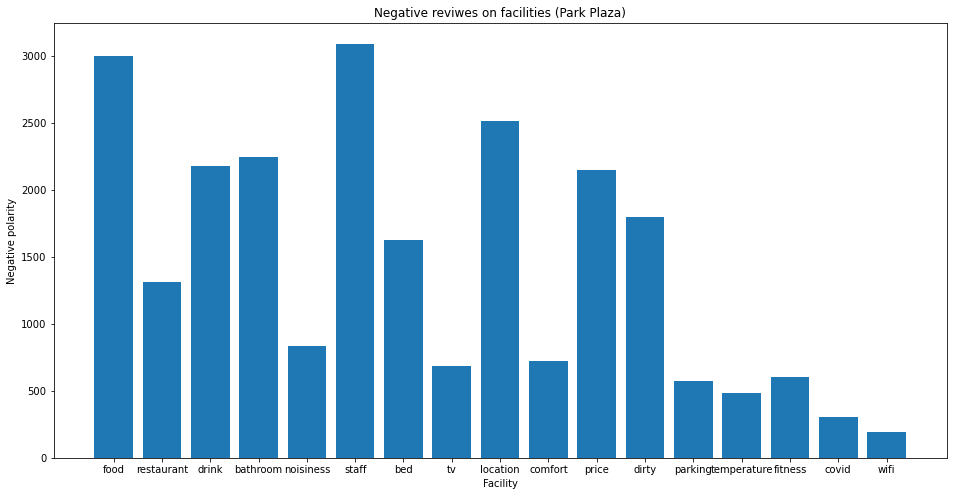

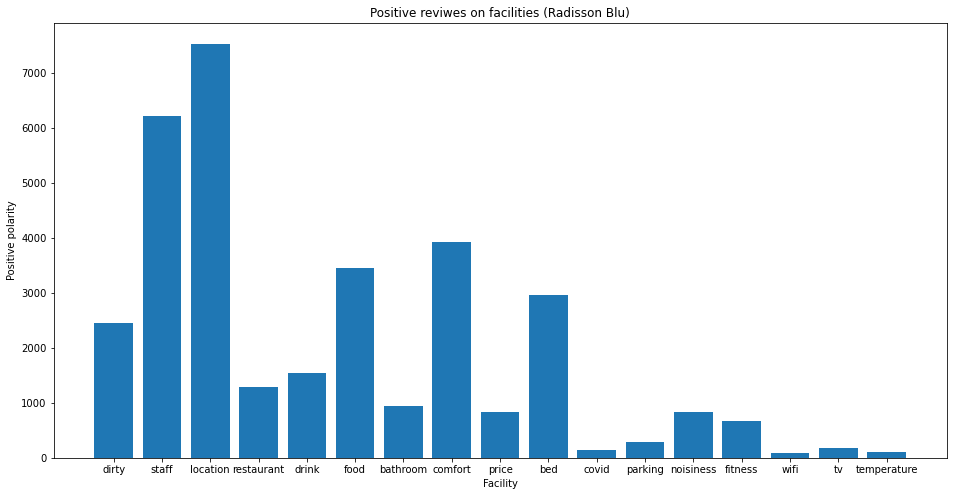

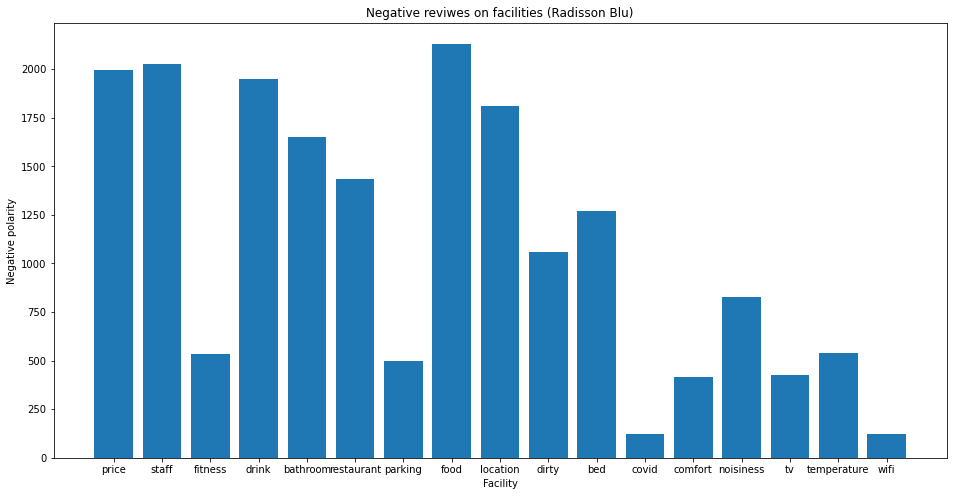

In [98]:
# Podeljeno na park plaza i radisson blu proveravamo usluge koje imaju najvise pohvala/primedba
# + iz svakog hotela uzmimao top 3 nusluge sa najvise pohvala primedba
dic_list_poz_pp = [fac_poz_westminster_pp, fac_poz_country_hall_pp, fac_poz_leeds_pp, fac_poz_park_royal_pp,
                   fac_poz_riverbank_pp, fac_poz_victoria_london_pp, fac_poz_victoria_pp, fac_poz_vondelpark_pp, 
                   fac_poz_wrocław_pp]

dic_list_poz_rb = [fac_poz_dubai_rb, fac_poz_edinburgh_rb, fac_poz_edwardian_rb, fac_poz_edwardian_london_rb, 
                   fac_poz_glasgow_rb, fac_poz_liverpool_rb, fac_poz_manchester_rb, fac_poz_sydney_rb]

dic_list_neg_pp = [fac_neg_westminster_pp, fac_neg_country_hall_pp, fac_neg_leeds_pp, fac_neg_park_royal_pp, 
                   fac_neg_riverbank_pp, fac_neg_victoria_london_pp, fac_neg_victoria_pp, fac_neg_vondelpark_pp, 
                   fac_neg_wrocław_pp]

dic_list_neg_rb = [fac_neg_dubai_rb, fac_neg_edinburgh_rb, fac_neg_edwardian_rb, fac_neg_edwardian_london_rb, 
                   fac_neg_glasgow_rb, fac_neg_liverpool_rb, fac_neg_manchester_rb, fac_neg_sydney_rb]

fac_poz_total_pp = {}
for dic in dic_list_poz_pp:
    for k in dic.keys():        
        if k in fac_poz_total_pp.keys():
            fac_poz_total_pp[k] = fac_poz_total_pp[k] + dic[k]
        else:
            fac_poz_total_pp[k] = dic[k]
print(fac_poz_total_pp)

fac_neg_total_pp = {}
for dic in dic_list_neg_pp:
    for k in dic.keys():        
        if k in fac_neg_total_pp.keys():
            fac_neg_total_pp[k] = fac_neg_total_pp[k] + dic[k]
        else:
            fac_neg_total_pp[k] = dic[k]
print(fac_neg_total_pp)

fac_poz_total_rb = {}
for dic in dic_list_poz_rb:
    for k in dic.keys():        
        if k in fac_poz_total_rb.keys():
            fac_poz_total_rb[k] = fac_poz_total_rb[k] + dic[k]
        else:
            fac_poz_total_rb[k] = dic[k]
print(fac_poz_total_rb)

fac_neg_total_rb = {}
for dic in dic_list_neg_rb:
    for k in dic.keys():        
        if k in fac_neg_total_rb.keys():
            fac_neg_total_rb[k] = fac_neg_total_rb[k] + dic[k]
        else:
            fac_neg_total_rb[k] = dic[k]
print(fac_neg_total_rb)

plt.figure(figsize=(16,8))
plt.ylabel('Positive polarity')
plt.xlabel('Facility')
plt.title('Positive reviwes on facilities (Park Plaza)')
keys = fac_poz_total_pp.keys()
values = fac_poz_total_pp.values()
plt.bar(keys, values)

plt.figure(figsize=(16,8))
plt.ylabel('Negative polarity')
plt.xlabel('Facility')
plt.title('Negative reviwes on facilities (Park Plaza)')
keys = fac_neg_total_pp.keys()
values = fac_neg_total_pp.values()
plt.bar(keys, values)

plt.figure(figsize=(16,8))
plt.ylabel('Positive polarity')
plt.xlabel('Facility')
plt.title('Positive reviwes on facilities (Radisson Blu)')
keys = fac_poz_total_rb.keys()
values = fac_poz_total_rb.values()
plt.bar(keys, values)

plt.figure(figsize=(16,8))
plt.ylabel('Negative polarity')
plt.xlabel('Facility')
plt.title('Negative reviwes on facilities (Radisson Blu)')
keys = fac_neg_total_rb.keys()
values = fac_neg_total_rb.values()
plt.bar(keys, values)

{'location': 4, 'food': 8, 'staff': 4, 'wifi': 1, 'comfort': 3, 'drink': 2, 'dirty': 3, 'restaurant': 1, 'bathroom': 1}
{'food': 2, 'restaurant': 1, 'drink': 1, 'bed': 2, 'bathroom': 6, 'location': 4, 'staff': 4, 'dirty': 2, 'covid': 1, 'tv': 2, 'noisiness': 1, 'price': 1}
{'dirty': 1, 'staff': 7, 'location': 5, 'bed': 4, 'comfort': 5, 'wifi': 1, 'noisiness': 1}
{'price': 2, 'staff': 3, 'fitness': 1, 'location': 2, 'temperature': 1, 'noisiness': 1, 'dirty': 2, 'food': 3, 'comfort': 2, 'tv': 2, 'bed': 1, 'drink': 1, 'restaurant': 1, 'wifi': 1, 'bathroom': 1}


<BarContainer object of 15 artists>

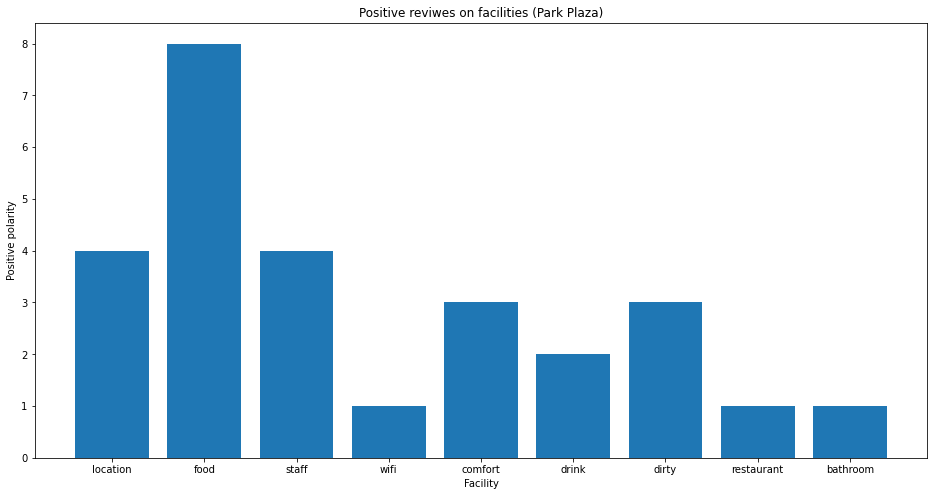

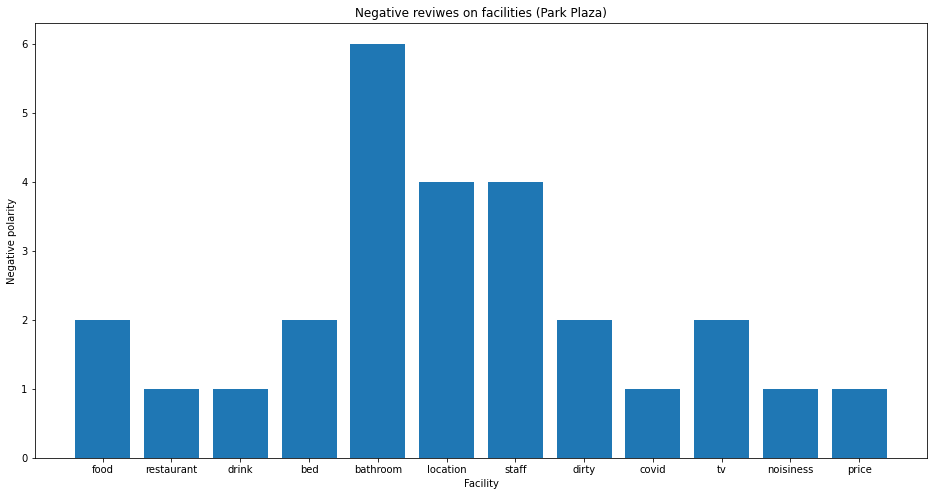

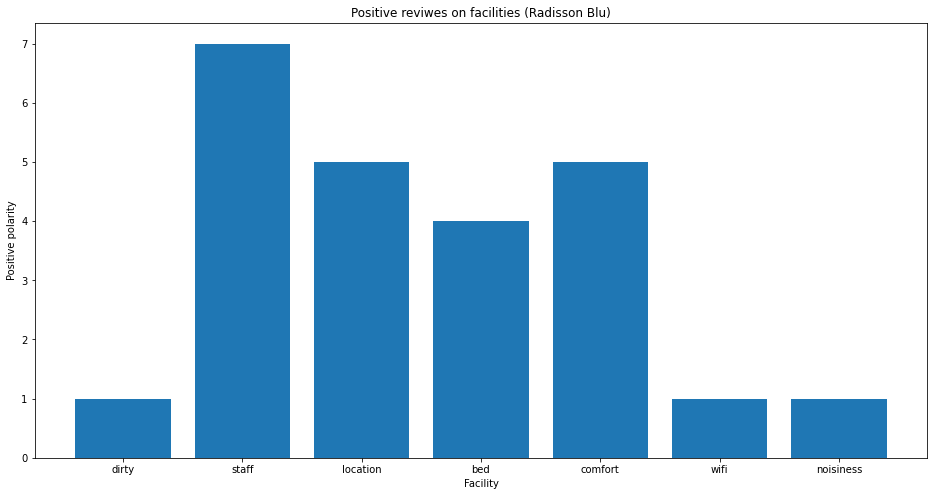

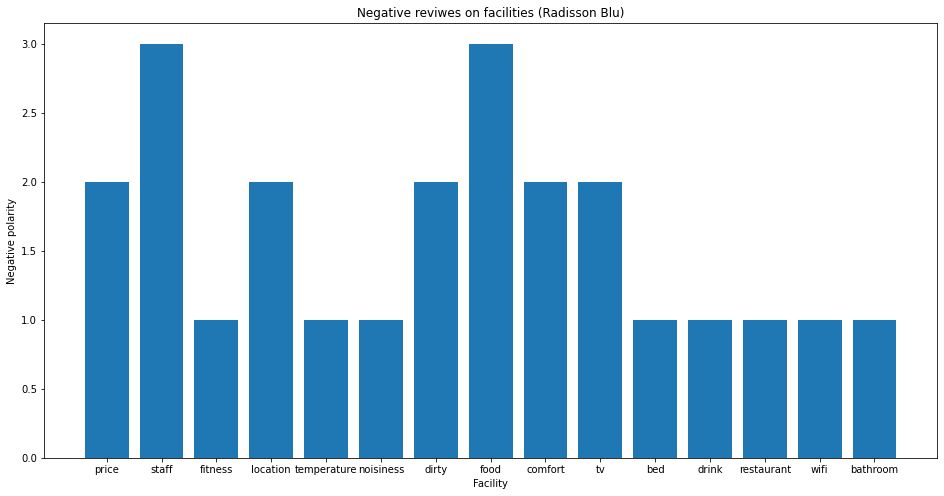

In [101]:
fac_poz_top3_pp = {}
for dic in dic_list_poz_pp:
    sort_dic = dict(sorted(dic.items(), key=operator.itemgetter(1),reverse=True))
    i = 0
    for k in dic.keys():        
        if i == 3:
            break
        if k in fac_poz_top3_pp.keys():
            fac_poz_top3_pp[k] = fac_poz_top3_pp[k] + 1
        else:
            fac_poz_top3_pp[k] = 1
        i = i + 1
print(fac_poz_top3_pp)

fac_neg_top3_pp = {}
for dic in dic_list_neg_pp:
    sort_dic = dict(sorted(dic.items(), key=operator.itemgetter(1),reverse=True))
    i = 0
    for k in dic.keys():        
        if i == 3:
            break
        if k in fac_neg_top3_pp.keys():
            fac_neg_top3_pp[k] = fac_neg_top3_pp[k] + 1
        else:
            fac_neg_top3_pp[k] = 1
        i = i + 1
print(fac_neg_top3_pp)

fac_poz_top3_rb = {}
for dic in dic_list_poz_rb:
    sort_dic = dict(sorted(dic.items(), key=operator.itemgetter(1),reverse=True))
    i = 0
    for k in dic.keys():        
        if i == 3:
            break
        if k in fac_poz_top3_rb.keys():
            fac_poz_top3_rb[k] = fac_poz_top3_rb[k] + 1
        else:
            fac_poz_top3_rb[k] = 1
        i = i + 1
print(fac_poz_top3_rb)

fac_neg_top3_rb = {}
for dic in dic_list_neg_rb:
    sort_dic = dict(sorted(dic.items(), key=operator.itemgetter(1),reverse=True))
    i = 0
    for k in dic.keys():        
        if i == 3:
            break
        if k in fac_neg_top3_rb.keys():
            fac_neg_top3_rb[k] = fac_neg_top3_rb[k] + 1
        else:
            fac_neg_top3_rb[k] = 1
        i = i + 1
print(fac_neg_top3_rb)

plt.figure(figsize=(16,8))
plt.ylabel('Positive polarity')
plt.xlabel('Facility')
plt.title('Positive reviwes on facilities (Park Plaza)')
keys = fac_poz_top3_pp.keys()
values = fac_poz_top3_pp.values()
plt.bar(keys, values)

plt.figure(figsize=(16,8))
plt.ylabel('Negative polarity')
plt.xlabel('Facility')
plt.title('Negative reviwes on facilities (Park Plaza)')
keys = fac_neg_top3_pp.keys()
values = fac_neg_top3_pp.values()
plt.bar(keys, values)

plt.figure(figsize=(16,8))
plt.ylabel('Positive polarity')
plt.xlabel('Facility')
plt.title('Positive reviwes on facilities (Radisson Blu)')
keys = fac_poz_top3_rb.keys()
values = fac_poz_top3_rb.values()
plt.bar(keys, values)

plt.figure(figsize=(16,8))
plt.ylabel('Negative polarity')
plt.xlabel('Facility')
plt.title('Negative reviwes on facilities (Radisson Blu)')
keys = fac_neg_top3_rb.keys()
values = fac_neg_top3_rb.values()
plt.bar(keys, values)